# Problem Statement: Unlocking Societal Trends in Aadhaar Enrolment and Updates

Identify meaningful patterns, trends, anomalies, or predictive indicators and translate them into clear insights or solution frameworks that can support informed decision-making and system improvements.


In [29]:
# Import required libraries
import pandas as pd
import numpy as np
import os

# ===============================
# STEP 1: Set dataset directory
# ===============================
# 👉 CHANGE THIS PATH to where your CSV files are stored
DATA_DIR = r"C:\Users\Jamal Khan\Downloads\api_data_aadhar_enrolment\api_data_aadhar_enrolment"

# Change working directory
os.chdir(DATA_DIR)

# ===============================
# STEP 2: Verify files exist
# ===============================
print("Files in directory:")
print(os.listdir())

# ===============================
# STEP 3: Load UIDAI CSV files
# ===============================
df1 = pd.read_csv("api_data_aadhar_enrolment_0_500000.csv")
df2 = pd.read_csv("api_data_aadhar_enrolment_500000_1000000.csv")
df3 = pd.read_csv("api_data_aadhar_enrolment_1000000_1006029.csv")

print("\nFiles loaded successfully!")

# ===============================
# STEP 4: Merge all datasets
# ===============================
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# ===============================
# STEP 5: Basic verification
# ===============================
print("\nMerged Dataset Shape:", combined_df.shape)
print("\nDataset Columns:")
print(combined_df.columns)

print("\nFirst 5 rows:")
combined_df.head()


Files in directory:
['aadhaar_fraud_priority_top1000.csv', 'aadhaar_fraud_risk_dashboard_statewise.csv', 'aadhaar_fraud_scored_full_dataset.csv', 'aadhaar_fraud_statewise_dashboard.csv', 'api_data_aadhar_enrolment_0_500000.csv', 'api_data_aadhar_enrolment_1000000_1006029.csv', 'api_data_aadhar_enrolment_500000_1000000.csv', 'demographic_patterns.png', 'outlier_analysis.png', 'temporal_analysis.png', 'Untitled.ipynb']

Files loaded successfully!

Merged Dataset Shape: (1006029, 7)

Dataset Columns:
Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

First 5 rows:


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [30]:
import pandas as pd

# Explore data structure, columns, and data types
print("=" * 60)
print("DATA STRUCTURE ANALYSIS")
print("=" * 60)

print("\n📋 COLUMNS:")
print(combined_df.columns.tolist())

print("\n📊 DATA TYPES:")
print(combined_df.dtypes)

print("\n🔍 FIRST 5 ROWS:")
print(combined_df.head())

print("\n📈 COLUMN SUMMARY:")
for col in combined_df.columns:
    print(f"\n{col}:")
    print(f"  - Type: {combined_df[col].dtype}")
    print(f"  - Unique values: {combined_df[col].nunique():,}")
    print(f"  - Null count: {combined_df[col].isnull().sum():,} ({combined_df[col].isnull().sum()/len(combined_df)*100:.2f}%)")
    if combined_df[col].dtype in ['int64', 'float64']:
        print(f"  - Min: {combined_df[col].min()}")
        print(f"  - Max: {combined_df[col].max()}")

DATA STRUCTURE ANALYSIS

📋 COLUMNS:
['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater']

📊 DATA TYPES:
date              object
state             object
district          object
pincode            int64
age_0_5            int64
age_5_17           int64
age_18_greater     int64
dtype: object

🔍 FIRST 5 ROWS:
         date          state          district  pincode  age_0_5  age_5_17  \
0  02-03-2025      Meghalaya  East Khasi Hills   793121       11        61   
1  09-03-2025      Karnataka   Bengaluru Urban   560043       14        33   
2  09-03-2025  Uttar Pradesh      Kanpur Nagar   208001       29        82   
3  09-03-2025  Uttar Pradesh           Aligarh   202133       62        29   
4  09-03-2025      Karnataka   Bengaluru Urban   560016       14        16   

   age_18_greater  
0              37  
1              39  
2              12  
3              15  
4              21  

📈 COLUMN SUMMARY:

date:
  - Type: object
  - Unique values: 92
  - Nul

In [31]:

# Data profiling with summary statistics and data quality metrics
print("=" * 60)
print("DATA PROFILING & QUALITY METRICS")
print("=" * 60)

print("\n📊 SUMMARY STATISTICS:")
print(combined_df.describe(include='all'))

# Data quality metrics
total_records = len(combined_df)
total_cells = total_records * len(combined_df.columns)
missing_cells = combined_df.isnull().sum().sum()
completeness = (1 - missing_cells / total_cells) * 100

print("\n✅ DATA QUALITY METRICS:")
print(f"Total records: {total_records:,}")
print(f"Total columns: {len(combined_df.columns)}")
print(f"Total cells: {total_cells:,}")
print(f"Missing cells: {missing_cells:,}")
print(f"Data completeness: {completeness:.2f}%")

# Check for duplicates
duplicate_count = combined_df.duplicated().sum()
print(f"Duplicate rows: {duplicate_count:,} ({duplicate_count/total_records*100:.2f}%)")

# Memory usage
memory_mb = combined_df.memory_usage(deep=True).sum() / 1024 / 1024
print(f"Memory usage: {memory_mb:.2f} MB")

print("\n📈 MISSING DATA BY COLUMN:")
missing_by_col = combined_df.isnull().sum().sort_values(ascending=False)
for col, count in missing_by_col.items():
    if count > 0:
        print(f"  {col}: {count:,} ({count/total_records*100:.2f}%)")
    
if missing_by_col.max() == 0:
    print("  ✓ No missing data found in any column!")

# Identify numeric and categorical columns
numeric_cols = combined_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = combined_df.select_dtypes(include=['object']).columns.tolist()

print(f"\n📊 COLUMN TYPES:")
print(f"Numeric columns ({len(numeric_cols)}): {numeric_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

DATA PROFILING & QUALITY METRICS

📊 SUMMARY STATISTICS:
              date          state district       pincode       age_0_5  \
count      1006029        1006029  1006029  1.006029e+06  1.006029e+06   
unique          92             55      985           NaN           NaN   
top     15-12-2025  Uttar Pradesh     Pune           NaN           NaN   
freq         19426         110369     6663           NaN           NaN   
mean           NaN            NaN      NaN  5.186415e+05  3.525709e+00   
std            NaN            NaN      NaN  2.056360e+05  1.753851e+01   
min            NaN            NaN      NaN  1.000000e+05  0.000000e+00   
25%            NaN            NaN      NaN  3.636410e+05  1.000000e+00   
50%            NaN            NaN      NaN  5.174170e+05  2.000000e+00   
75%            NaN            NaN      NaN  7.001040e+05  3.000000e+00   
max            NaN            NaN      NaN  8.554560e+05  2.688000e+03   

            age_5_17  age_18_greater  
count   1.006029

# Enrollment trends

Analysis Period: 2025-03-02 to 2025-12-31

Total Enrollments: 5,435,702
Daily Average: 59,084
Peak Day: 2025-07-01 with 616,868 enrollments

✓ Created 4 temporal trend visualizations


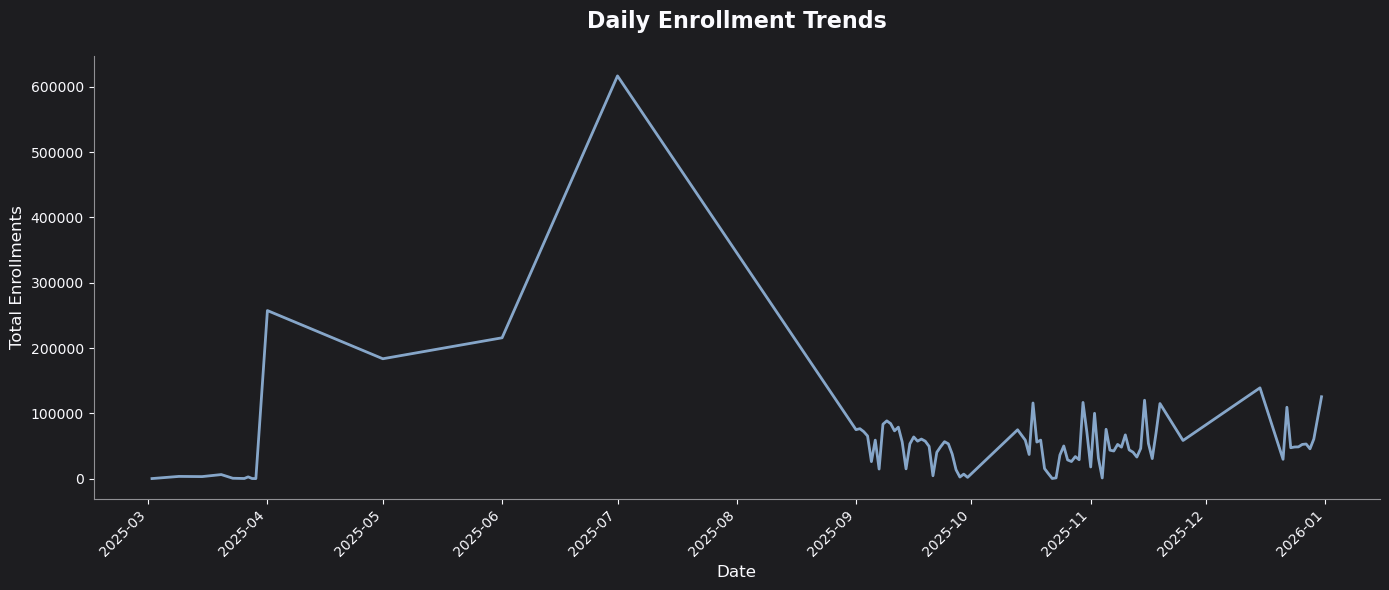

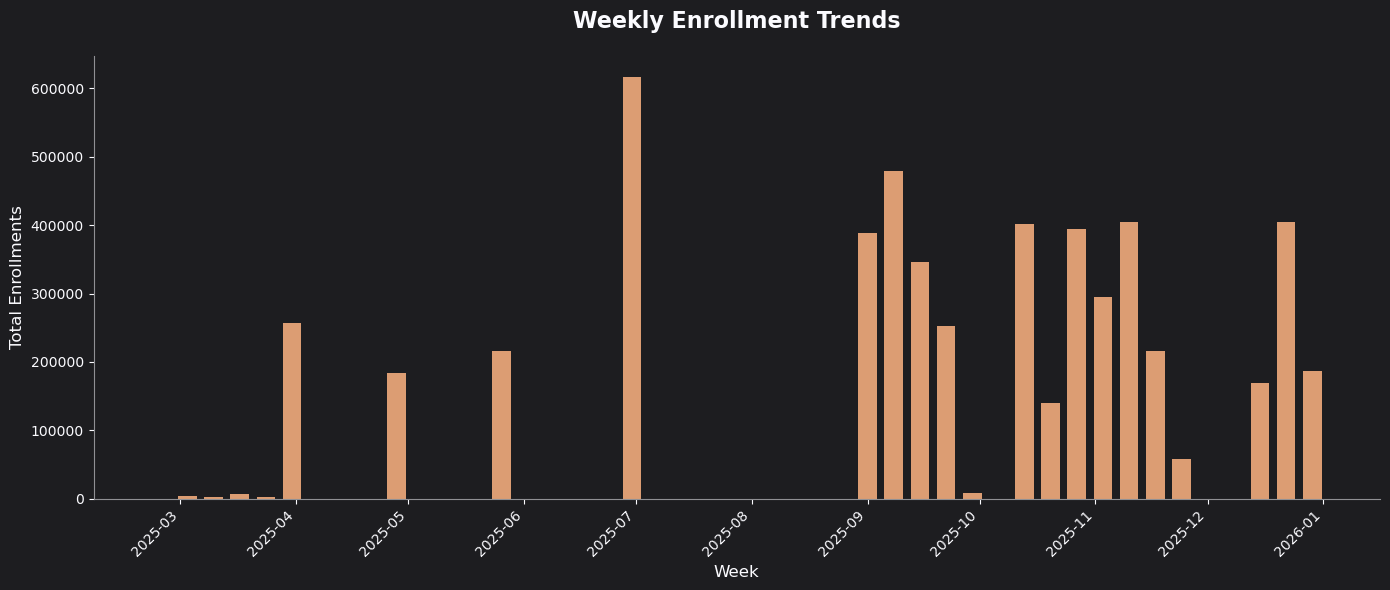

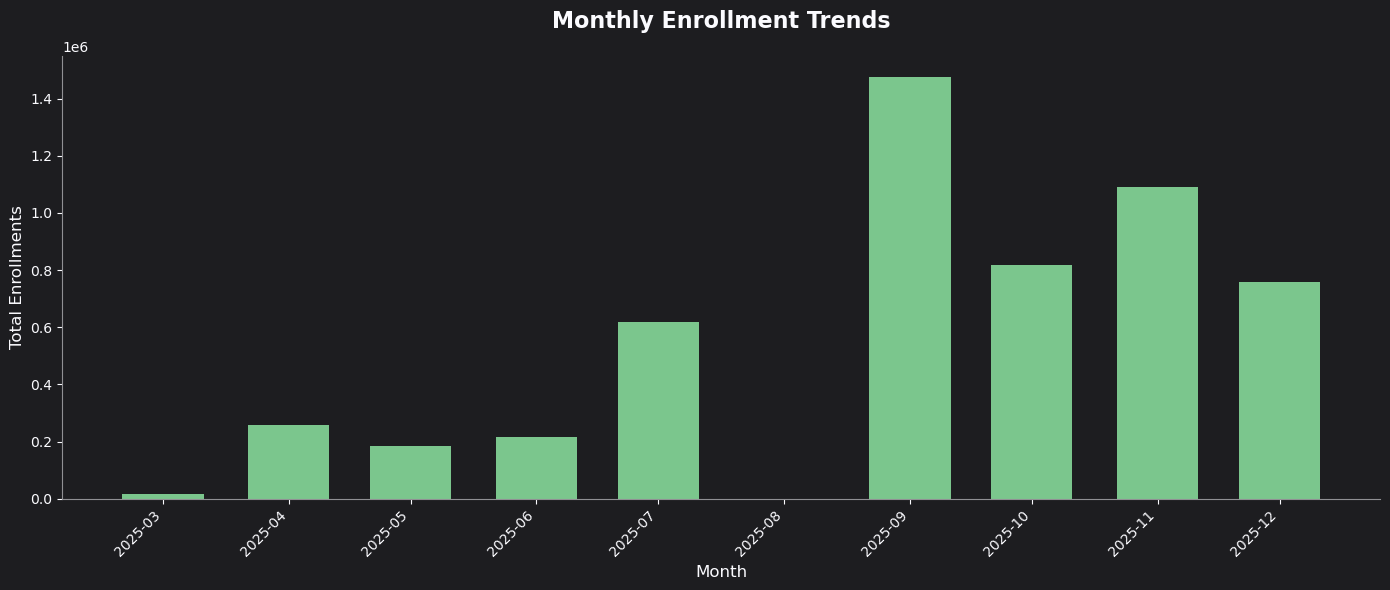

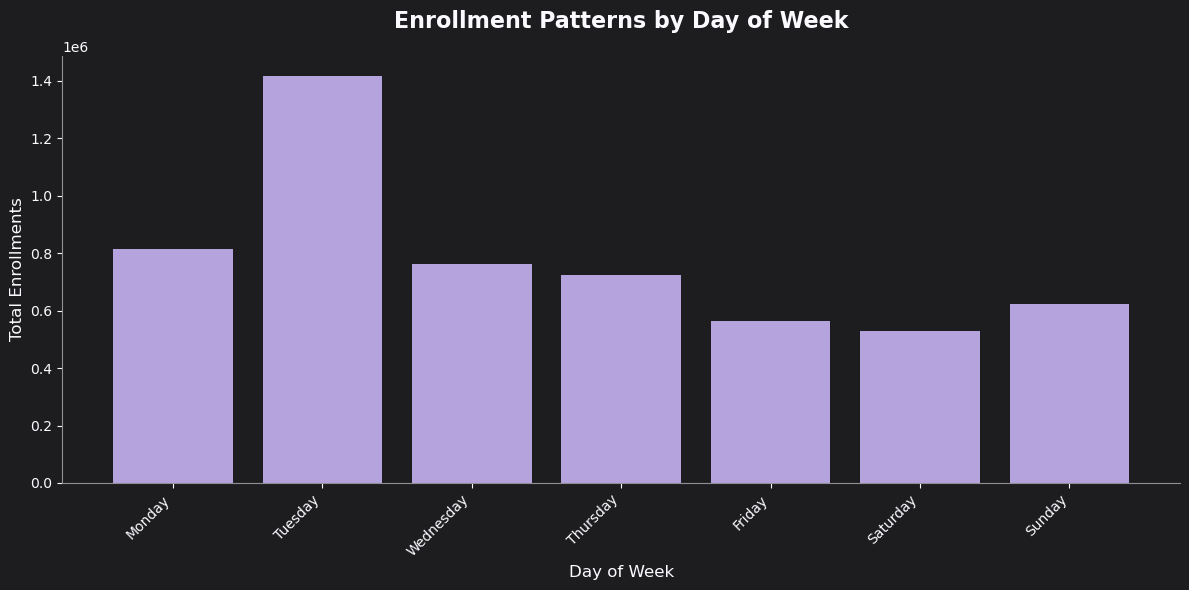

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a copy and parse date column
enrollment_df = combined_df.copy()
enrollment_df['date'] = pd.to_datetime(enrollment_df['date'], format='%d-%m-%Y')

# Calculate total enrollments per record
enrollment_df['total_enrollment'] = enrollment_df['age_0_5'] + enrollment_df['age_5_17'] + enrollment_df['age_18_greater']

# Daily enrollment trends
daily_enrollments = enrollment_df.groupby('date')['total_enrollment'].sum().reset_index()
daily_enrollments = daily_enrollments.sort_values('date')

# Weekly enrollment trends
enrollment_df['week'] = enrollment_df['date'].dt.to_period('W')
weekly_enrollments = enrollment_df.groupby('week')['total_enrollment'].sum().reset_index()
weekly_enrollments['week_start'] = weekly_enrollments['week'].apply(lambda x: x.start_time)

# Monthly enrollment trends
enrollment_df['month'] = enrollment_df['date'].dt.to_period('M')
monthly_enrollments = enrollment_df.groupby('month')['total_enrollment'].sum().reset_index()
monthly_enrollments['month_start'] = monthly_enrollments['month'].apply(lambda x: x.start_time)

# Day of week patterns
enrollment_df['day_of_week'] = enrollment_df['date'].dt.day_name()
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_enrollments = enrollment_df.groupby('day_of_week')['total_enrollment'].sum().reindex(dow_order).reset_index()

print(f"Analysis Period: {enrollment_df['date'].min().strftime('%Y-%m-%d')} to {enrollment_df['date'].max().strftime('%Y-%m-%d')}")
print(f"\nTotal Enrollments: {enrollment_df['total_enrollment'].sum():,}")
print(f"Daily Average: {daily_enrollments['total_enrollment'].mean():,.0f}")
print(f"Peak Day: {daily_enrollments.loc[daily_enrollments['total_enrollment'].idxmax(), 'date'].strftime('%Y-%m-%d')} with {daily_enrollments['total_enrollment'].max():,} enrollments")

# Create temporal trend visualizations
# Daily trends
fig1, ax1 = plt.subplots(figsize=(14, 6), facecolor='#1D1D20')
ax1.set_facecolor('#1D1D20')
ax1.plot(daily_enrollments['date'], daily_enrollments['total_enrollment'], 
         color='#A1C9F4', linewidth=2, alpha=0.8)
ax1.set_xlabel('Date', fontsize=12, color='#fbfbff')
ax1.set_ylabel('Total Enrollments', fontsize=12, color='#fbfbff')
ax1.set_title('Daily Enrollment Trends', fontsize=16, fontweight='bold', color='#fbfbff', pad=20)
ax1.tick_params(colors='#fbfbff', labelsize=10)
ax1.spines['bottom'].set_color('#909094')
ax1.spines['left'].set_color('#909094')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
daily_trend_chart = fig1

# Weekly trends
fig2, ax2 = plt.subplots(figsize=(14, 6), facecolor='#1D1D20')
ax2.set_facecolor('#1D1D20')
ax2.bar(weekly_enrollments['week_start'], weekly_enrollments['total_enrollment'], 
        color='#FFB482', alpha=0.85, width=5)
ax2.set_xlabel('Week', fontsize=12, color='#fbfbff')
ax2.set_ylabel('Total Enrollments', fontsize=12, color='#fbfbff')
ax2.set_title('Weekly Enrollment Trends', fontsize=16, fontweight='bold', color='#fbfbff', pad=20)
ax2.tick_params(colors='#fbfbff', labelsize=10)
ax2.spines['bottom'].set_color('#909094')
ax2.spines['left'].set_color('#909094')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
weekly_trend_chart = fig2

# Monthly trends
fig3, ax3 = plt.subplots(figsize=(14, 6), facecolor='#1D1D20')
ax3.set_facecolor('#1D1D20')
ax3.bar(monthly_enrollments['month_start'], monthly_enrollments['total_enrollment'], 
        color='#8DE5A1', alpha=0.85, width=20)
ax3.set_xlabel('Month', fontsize=12, color='#fbfbff')
ax3.set_ylabel('Total Enrollments', fontsize=12, color='#fbfbff')
ax3.set_title('Monthly Enrollment Trends', fontsize=16, fontweight='bold', color='#fbfbff', pad=20)
ax3.tick_params(colors='#fbfbff', labelsize=10)
ax3.spines['bottom'].set_color('#909094')
ax3.spines['left'].set_color('#909094')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
monthly_trend_chart = fig3

# Day of week patterns
fig4, ax4 = plt.subplots(figsize=(12, 6), facecolor='#1D1D20')
ax4.set_facecolor('#1D1D20')
ax4.bar(dow_enrollments['day_of_week'], dow_enrollments['total_enrollment'], 
        color='#D0BBFF', alpha=0.85)
ax4.set_xlabel('Day of Week', fontsize=12, color='#fbfbff')
ax4.set_ylabel('Total Enrollments', fontsize=12, color='#fbfbff')
ax4.set_title('Enrollment Patterns by Day of Week', fontsize=16, fontweight='bold', color='#fbfbff', pad=20)
ax4.tick_params(colors='#fbfbff', labelsize=10)
ax4.spines['bottom'].set_color('#909094')
ax4.spines['left'].set_color('#909094')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
day_of_week_chart = fig4

print(f"\n✓ Created 4 temporal trend visualizations")


C:\Users\Jamal Khan\AppData\Local\Temp\ipykernel_38748\3919491313.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_25_districts['location'] = top_25_districts['district'] + ', ' + top_25_districts['state']


GEOGRAPHIC ENROLLMENT HOTSPOTS

Top 10 States by Enrollment Volume:
--------------------------------------------------------------------------------
Uttar Pradesh                     1,018,629 enrollments ( 89 districts)
Bihar                               609,585 enrollments ( 48 districts)
Madhya Pradesh                      493,970 enrollments ( 61 districts)
West Bengal                         375,297 enrollments ( 58 districts)
Maharashtra                         369,139 enrollments ( 53 districts)
Rajasthan                           348,458 enrollments ( 43 districts)
Gujarat                             280,549 enrollments ( 40 districts)
Assam                               230,197 enrollments ( 38 districts)
Karnataka                           223,235 enrollments ( 56 districts)
Tamil Nadu                          220,789 enrollments ( 46 districts)


Top 15 Districts by Enrollment Volume:
--------------------------------------------------------------------------------
Thane    

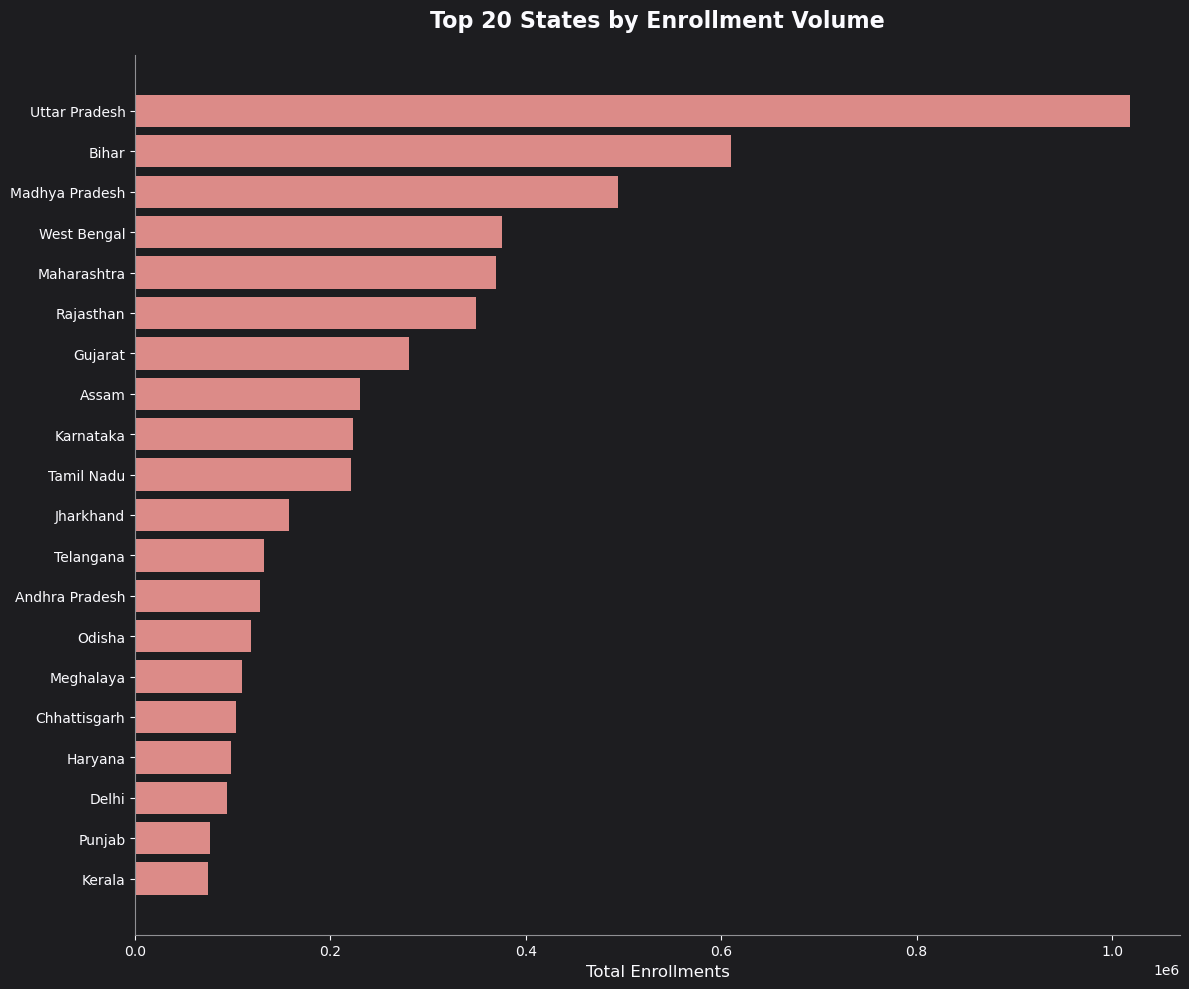

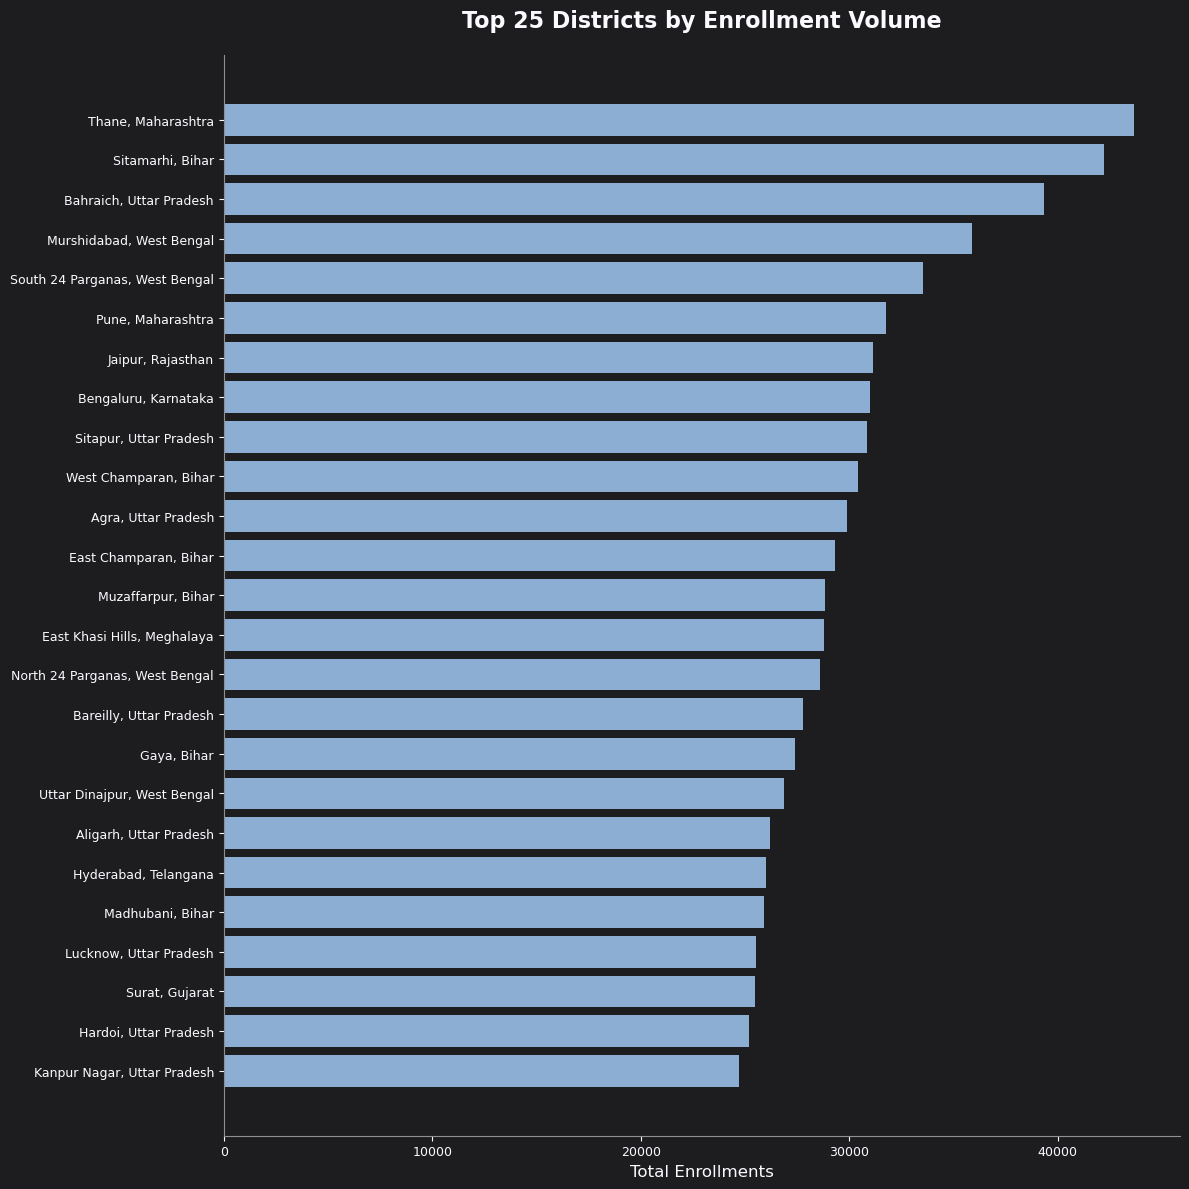

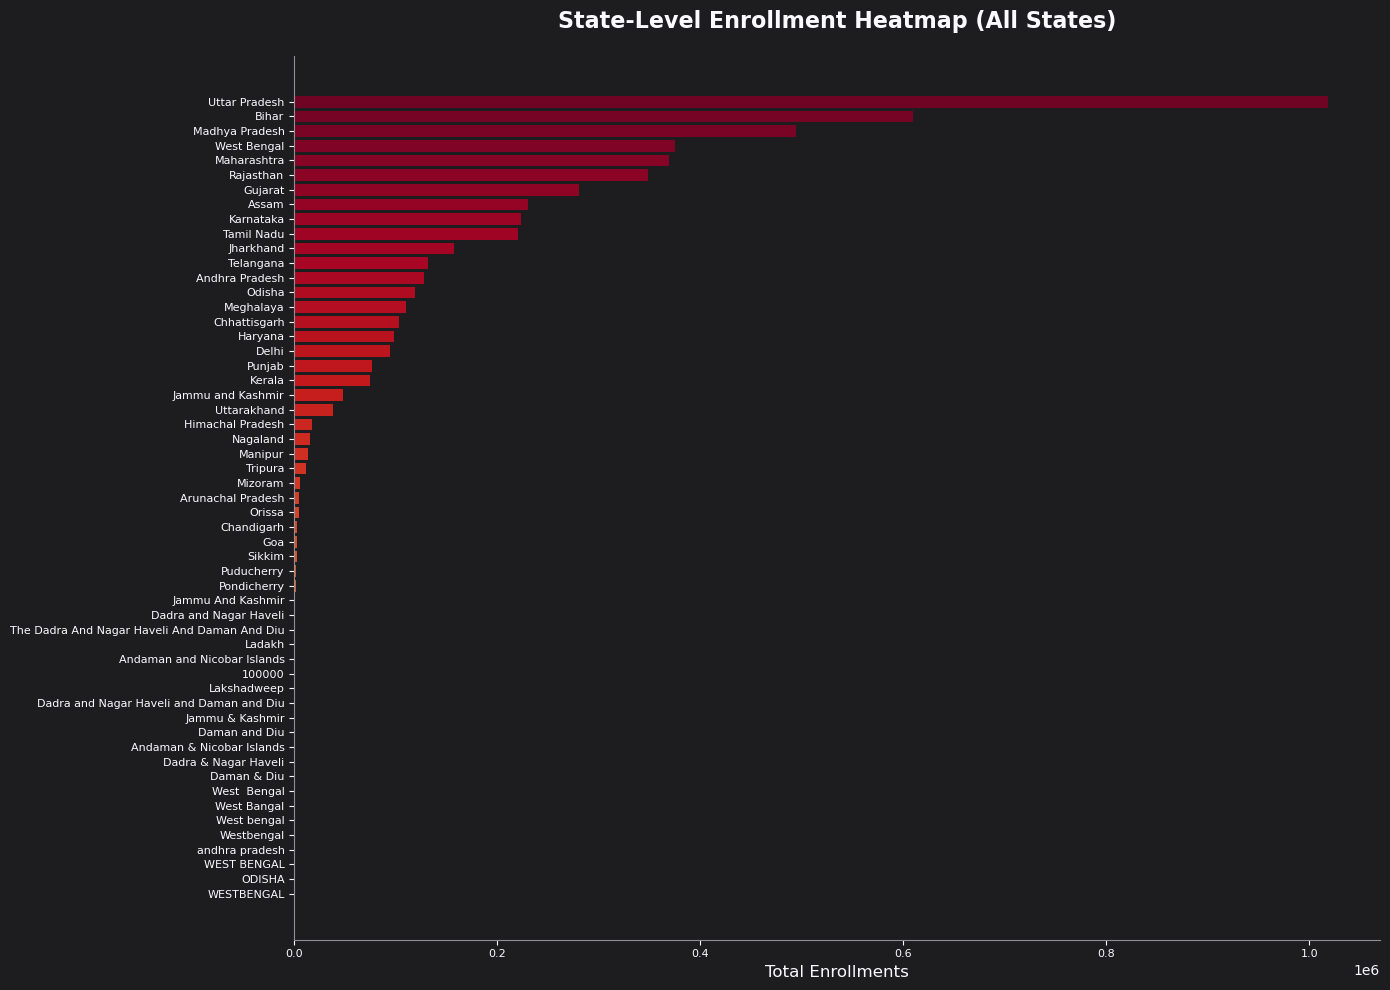

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use enrollment_df from previous block (has parsed dates and total_enrollment)
# Aggregate enrollments by state
state_enrollments = enrollment_df.groupby('state').agg({
    'total_enrollment': 'sum',
    'district': 'nunique'
}).reset_index()
state_enrollments.columns = ['state', 'total_enrollment', 'num_districts']
state_enrollments = state_enrollments.sort_values('total_enrollment', ascending=False)

# Aggregate enrollments by district
district_enrollments = enrollment_df.groupby(['state', 'district'])['total_enrollment'].sum().reset_index()
district_enrollments = district_enrollments.sort_values('total_enrollment', ascending=False)

# Top 20 states
top_20_states = state_enrollments.head(20)

# Top 25 districts
top_25_districts = district_enrollments.head(25)
top_25_districts['location'] = top_25_districts['district'] + ', ' + top_25_districts['state']

print("=" * 80)
print("GEOGRAPHIC ENROLLMENT HOTSPOTS")
print("=" * 80)
print("\nTop 10 States by Enrollment Volume:")
print("-" * 80)
for idx, row in state_enrollments.head(10).iterrows():
    print(f"{row['state']:<30} {row['total_enrollment']:>12,} enrollments ({row['num_districts']:>3} districts)")

print("\n\nTop 15 Districts by Enrollment Volume:")
print("-" * 80)
for idx, row in district_enrollments.head(15).iterrows():
    print(f"{row['district']:<25} ({row['state']:<20}) {row['total_enrollment']:>12,} enrollments")

# State-level horizontal bar chart (Top 20)
fig1, ax1 = plt.subplots(figsize=(12, 10), facecolor='#1D1D20')
ax1.set_facecolor('#1D1D20')
bars1 = ax1.barh(range(len(top_20_states)), top_20_states['total_enrollment'], 
                  color='#FF9F9B', alpha=0.85)
ax1.set_yticks(range(len(top_20_states)))
ax1.set_yticklabels(top_20_states['state'], fontsize=10)
ax1.set_xlabel('Total Enrollments', fontsize=12, color='#fbfbff')
ax1.set_title('Top 20 States by Enrollment Volume', fontsize=16, fontweight='bold', 
              color='#fbfbff', pad=20)
ax1.tick_params(colors='#fbfbff', labelsize=10)
ax1.spines['bottom'].set_color('#909094')
ax1.spines['left'].set_color('#909094')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.invert_yaxis()
plt.tight_layout()
state_hotspot_chart = fig1

# District-level horizontal bar chart (Top 25)
fig2, ax2 = plt.subplots(figsize=(12, 12), facecolor='#1D1D20')
ax2.set_facecolor('#1D1D20')
bars2 = ax2.barh(range(len(top_25_districts)), top_25_districts['total_enrollment'], 
                  color='#A1C9F4', alpha=0.85)
ax2.set_yticks(range(len(top_25_districts)))
ax2.set_yticklabels(top_25_districts['location'], fontsize=9)
ax2.set_xlabel('Total Enrollments', fontsize=12, color='#fbfbff')
ax2.set_title('Top 25 Districts by Enrollment Volume', fontsize=16, fontweight='bold', 
              color='#fbfbff', pad=20)
ax2.tick_params(colors='#fbfbff', labelsize=9)
ax2.spines['bottom'].set_color('#909094')
ax2.spines['left'].set_color('#909094')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.invert_yaxis()
plt.tight_layout()
district_hotspot_chart = fig2

# State enrollment heatmap-style visualization
fig3, ax3 = plt.subplots(figsize=(14, 10), facecolor='#1D1D20')
ax3.set_facecolor('#1D1D20')

# Create categorical heatmap for all states
all_states = state_enrollments.sort_values('total_enrollment', ascending=True)
y_positions = np.arange(len(all_states))
colors_map = plt.cm.YlOrRd(np.linspace(0.3, 1, len(all_states)))

bars = ax3.barh(y_positions, all_states['total_enrollment'], color=colors_map, alpha=0.85)
ax3.set_yticks(y_positions)
ax3.set_yticklabels(all_states['state'], fontsize=8)
ax3.set_xlabel('Total Enrollments', fontsize=12, color='#fbfbff')
ax3.set_title('State-Level Enrollment Heatmap (All States)', fontsize=16, fontweight='bold', 
              color='#fbfbff', pad=20)
ax3.tick_params(colors='#fbfbff', labelsize=8)
ax3.spines['bottom'].set_color('#909094')
ax3.spines['left'].set_color('#909094')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
plt.tight_layout()
state_heatmap_chart = fig3

print(f"\n✓ Created 3 geographic hotspot visualizations")
print(f"✓ Total unique states: {len(state_enrollments)}")
print(f"✓ Total unique districts: {len(district_enrollments)}")


OUTLIER DETECTION ANALYSIS

Dataset: 1,006,029 records

Total Enrollments Statistics:
  Mean: 5.40
  Median: 2.00
  Std Dev: 31.58
  Min: 1
  Max: 3965

────────────────────────────────────────────────────────────
IQR-based Outliers (3*IQR method):
────────────────────────────────────────────────────────────
Total Enrollments: 35,519 outliers (3.53%)
  Bounds: [-11, 17]

Age 0-5: 55,107 outliers (5.48%)
  Bounds: [-5, 9]

Age 5-17: 66,948 outliers (6.65%)
  Bounds: [-3, 4]

Age 18+: 40,225 outliers (4.00%)
  Bounds: [0, 0]

────────────────────────────────────────────────────────────
Z-score Outliers (|z| > 3): 2,962 records (0.29%)
────────────────────────────────────────────────────────────


C:\Users\Jamal Khan\AppData\Local\Temp\ipykernel_38748\693527983.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = ax2.boxplot([combined_df['age_0_5'], combined_df['age_5_17'], combined_df['age_18_greater']],


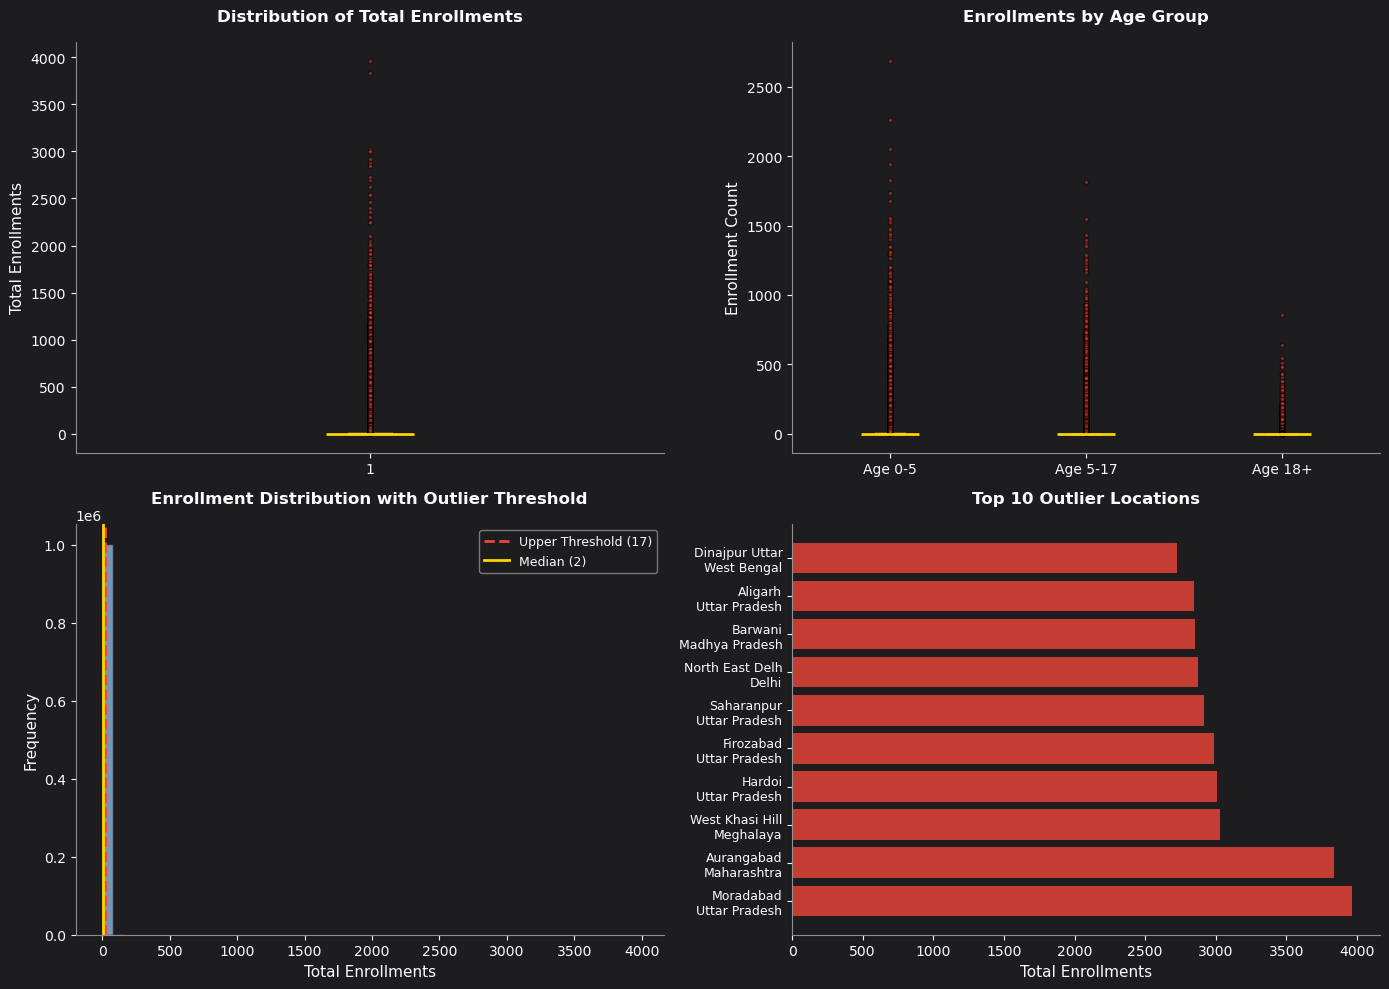

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Calculate total enrollments per record
combined_df['total_enrollments'] = combined_df['age_0_5'] + combined_df['age_5_17'] + combined_df['age_18_greater']

# Statistical outlier detection using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR  # Using 3*IQR for extreme outliers
    upper_bound = Q3 + 3 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in total enrollments
outliers_total, lower_total, upper_total = detect_outliers_iqr(combined_df, 'total_enrollments')

# Detect outliers in each age group
outliers_age_0_5, lower_0_5, upper_0_5 = detect_outliers_iqr(combined_df, 'age_0_5')
outliers_age_5_17, lower_5_17, upper_5_17 = detect_outliers_iqr(combined_df, 'age_5_17')
outliers_age_18_plus, lower_18, upper_18 = detect_outliers_iqr(combined_df, 'age_18_greater')

# Z-score based outlier detection (|z| > 3)
z_scores_total = np.abs(stats.zscore(combined_df['total_enrollments']))
outliers_zscore = combined_df[z_scores_total > 3]

print("=" * 60)
print("OUTLIER DETECTION ANALYSIS")
print("=" * 60)
print(f"\nDataset: {len(combined_df):,} records")
print(f"\nTotal Enrollments Statistics:")
print(f"  Mean: {combined_df['total_enrollments'].mean():.2f}")
print(f"  Median: {combined_df['total_enrollments'].median():.2f}")
print(f"  Std Dev: {combined_df['total_enrollments'].std():.2f}")
print(f"  Min: {combined_df['total_enrollments'].min()}")
print(f"  Max: {combined_df['total_enrollments'].max()}")

print(f"\n{'─'*60}")
print("IQR-based Outliers (3*IQR method):")
print(f"{'─'*60}")
print(f"Total Enrollments: {len(outliers_total):,} outliers ({len(outliers_total)/len(combined_df)*100:.2f}%)")
print(f"  Bounds: [{lower_total:.0f}, {upper_total:.0f}]")
print(f"\nAge 0-5: {len(outliers_age_0_5):,} outliers ({len(outliers_age_0_5)/len(combined_df)*100:.2f}%)")
print(f"  Bounds: [{lower_0_5:.0f}, {upper_0_5:.0f}]")
print(f"\nAge 5-17: {len(outliers_age_5_17):,} outliers ({len(outliers_age_5_17)/len(combined_df)*100:.2f}%)")
print(f"  Bounds: [{lower_5_17:.0f}, {upper_5_17:.0f}]")
print(f"\nAge 18+: {len(outliers_age_18_plus):,} outliers ({len(outliers_age_18_plus)/len(combined_df)*100:.2f}%)")
print(f"  Bounds: [{lower_18:.0f}, {upper_18:.0f}]")

print(f"\n{'─'*60}")
print(f"Z-score Outliers (|z| > 3): {len(outliers_zscore):,} records ({len(outliers_zscore)/len(combined_df)*100:.2f}%)")
print(f"{'─'*60}")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.patch.set_facecolor('#1D1D20')

# Boxplot for total enrollments
ax1 = axes[0, 0]
ax1.set_facecolor('#1D1D20')
bp1 = ax1.boxplot(combined_df['total_enrollments'], vert=True, patch_artist=True)
bp1['boxes'][0].set_facecolor('#A1C9F4')
bp1['medians'][0].set_color('#ffd400')
bp1['medians'][0].set_linewidth(2)
for whisker in bp1['whiskers']:
    whisker.set_color('#fbfbff')
for cap in bp1['caps']:
    cap.set_color('#fbfbff')
for flier in bp1['fliers']:
    flier.set_marker('o')
    flier.set_markerfacecolor('#f04438')
    flier.set_markersize(3)
    flier.set_alpha(0.5)
ax1.set_ylabel('Total Enrollments', fontsize=11, color='#fbfbff')
ax1.set_title('Distribution of Total Enrollments', fontsize=12, fontweight='bold', color='#fbfbff', pad=15)
ax1.tick_params(colors='#fbfbff')
ax1.spines['bottom'].set_color('#909094')
ax1.spines['left'].set_color('#909094')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Age group boxplots
ax2 = axes[0, 1]
ax2.set_facecolor('#1D1D20')
bp2 = ax2.boxplot([combined_df['age_0_5'], combined_df['age_5_17'], combined_df['age_18_greater']], 
                   labels=['Age 0-5', 'Age 5-17', 'Age 18+'], patch_artist=True)
colors = ['#A1C9F4', '#FFB482', '#8DE5A1']
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
for median in bp2['medians']:
    median.set_color('#ffd400')
    median.set_linewidth(2)
for whisker in bp2['whiskers']:
    whisker.set_color('#fbfbff')
for cap in bp2['caps']:
    cap.set_color('#fbfbff')
for flier in bp2['fliers']:
    flier.set_marker('o')
    flier.set_markerfacecolor('#f04438')
    flier.set_markersize(3)
    flier.set_alpha(0.5)
ax2.set_ylabel('Enrollment Count', fontsize=11, color='#fbfbff')
ax2.set_title('Enrollments by Age Group', fontsize=12, fontweight='bold', color='#fbfbff', pad=15)
ax2.tick_params(colors='#fbfbff')
ax2.spines['bottom'].set_color('#909094')
ax2.spines['left'].set_color('#909094')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Histogram with outlier threshold
ax3 = axes[1, 0]
ax3.set_facecolor('#1D1D20')
ax3.hist(combined_df['total_enrollments'], bins=50, color='#A1C9F4', alpha=0.7, edgecolor='#1D1D20')
ax3.axvline(upper_total, color='#f04438', linestyle='--', linewidth=2, label=f'Upper Threshold ({upper_total:.0f})')
ax3.axvline(combined_df['total_enrollments'].median(), color='#ffd400', linestyle='-', linewidth=2, label=f'Median ({combined_df["total_enrollments"].median():.0f})')
ax3.set_xlabel('Total Enrollments', fontsize=11, color='#fbfbff')
ax3.set_ylabel('Frequency', fontsize=11, color='#fbfbff')
ax3.set_title('Enrollment Distribution with Outlier Threshold', fontsize=12, fontweight='bold', color='#fbfbff', pad=15)
ax3.legend(loc='upper right', fontsize=9, facecolor='#1D1D20', edgecolor='#909094', labelcolor='#fbfbff')
ax3.tick_params(colors='#fbfbff')
ax3.spines['bottom'].set_color('#909094')
ax3.spines['left'].set_color('#909094')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Top outlier locations
ax4 = axes[1, 1]
ax4.set_facecolor('#1D1D20')
top_outliers = outliers_total.nlargest(10, 'total_enrollments')
ax4.barh(range(len(top_outliers)), top_outliers['total_enrollments'].values, color='#f04438', alpha=0.8)
labels = [f"{row['district'][:15]}\n{row['state'][:15]}" for _, row in top_outliers.iterrows()]
ax4.set_yticks(range(len(top_outliers)))
ax4.set_yticklabels(labels, fontsize=9, color='#fbfbff')
ax4.set_xlabel('Total Enrollments', fontsize=11, color='#fbfbff')
ax4.set_title('Top 10 Outlier Locations', fontsize=12, fontweight='bold', color='#fbfbff', pad=15)
ax4.tick_params(colors='#fbfbff')
ax4.spines['bottom'].set_color('#909094')
ax4.spines['left'].set_color('#909094')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('outlier_analysis.png', facecolor='#1D1D20', dpi=100, bbox_inches='tight')
plt.show()

# Store outlier data for downstream analysis
outlier_records = outliers_total.copy()


DEMOGRAPHIC PATTERN ANALYSIS

Expected Demographic Distribution (India Census):
  Age 0-5: 9%
  Age 5-17: 19%
  Age 18+: 72%

Actual Average Distribution in Dataset:
  Age 0-5: 74.01%
  Age 5-17: 24.39%
  Age 18+: 1.59%

──────────────────────────────────────────────────────────────────────
Unusual Demographic Patterns (>30% deviation from expected):
──────────────────────────────────────────────────────────────────────
High Age 0-5 proportion: 888,230 records (88.29%)
High Age 5-17 proportion: 378,468 records (37.62%)
High Age 18+ proportion: 7,613 records (0.76%)

──────────────────────────────────────────────────────────────────────
Extreme Demographic Skew (>80% in single age group):
──────────────────────────────────────────────────────────────────────
Age 0-5 dominant: 584,721 records (58.12%)
Age 5-17 dominant: 112,131 records (11.15%)
Age 18+ dominant: 8,003 records (0.80%)

Total records with extreme skew: 704,855
Mean demographic deviation: 164.90
Median demographic deviation

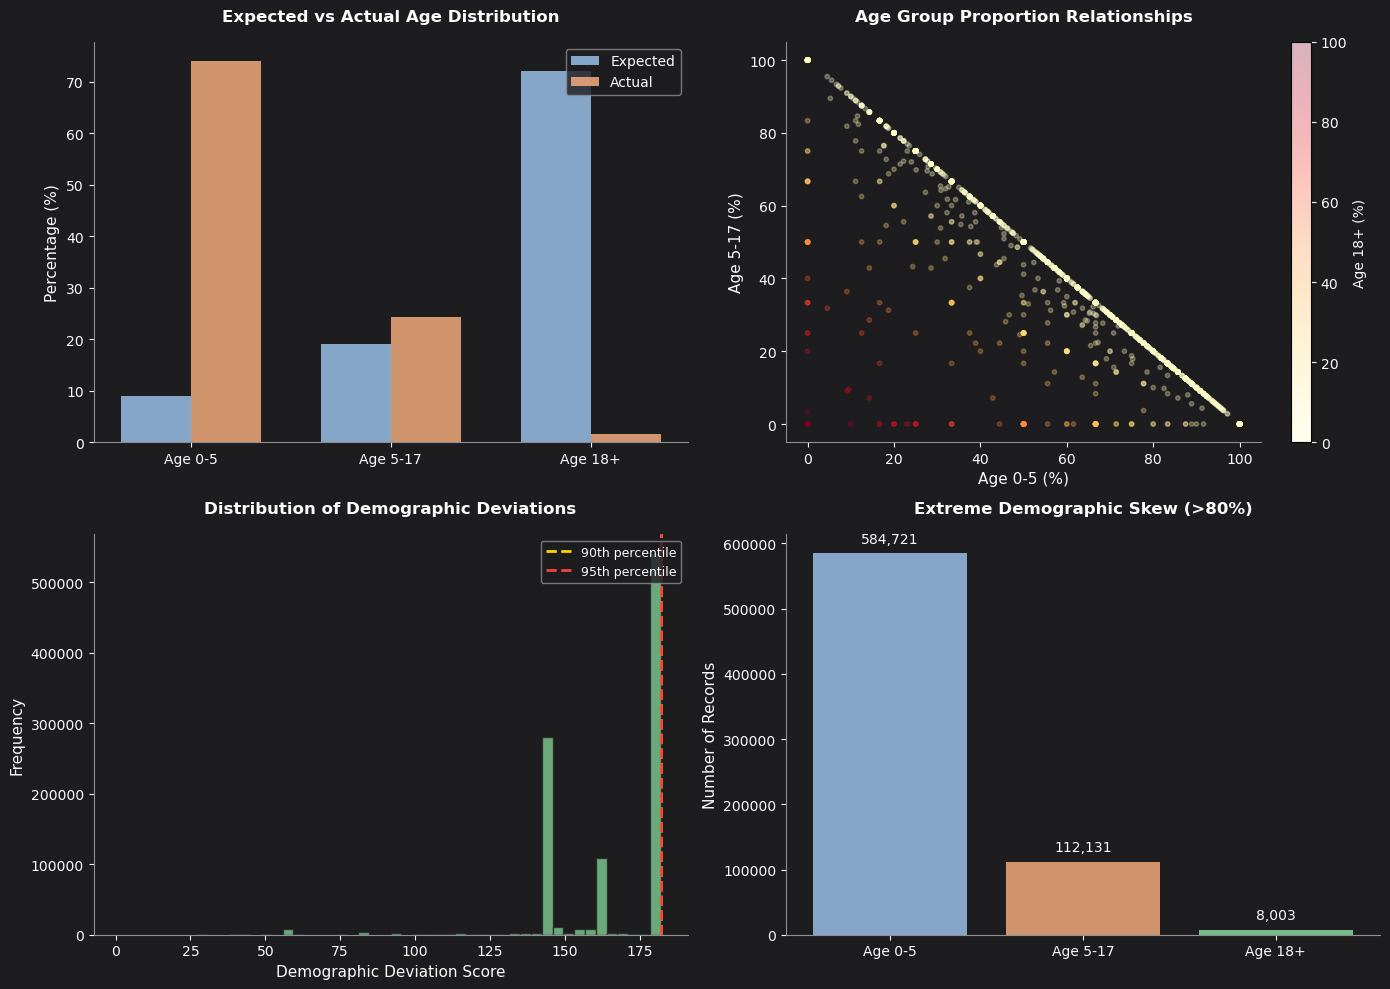

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Calculate age group proportions
combined_df['age_0_5_pct'] = (combined_df['age_0_5'] / combined_df['total_enrollments']) * 100
combined_df['age_5_17_pct'] = (combined_df['age_5_17'] / combined_df['total_enrollments']) * 100
combined_df['age_18_plus_pct'] = (combined_df['age_18_greater'] / combined_df['total_enrollments']) * 100

# Handle division by zero (single enrollments)
combined_df['age_0_5_pct'] = combined_df['age_0_5_pct'].fillna(0)
combined_df['age_5_17_pct'] = combined_df['age_5_17_pct'].fillna(0)
combined_df['age_18_plus_pct'] = combined_df['age_18_plus_pct'].fillna(0)

# Expected demographic patterns (India census approximations)
# Children 0-5: ~8-10%, Youth 5-17: ~18-20%, Adults 18+: ~70-75%
expected_0_5 = 9
expected_5_17 = 19
expected_18_plus = 72

# Identify unusual demographic patterns (deviations > 30% from expected)
unusual_0_5 = combined_df[combined_df['age_0_5_pct'] > expected_0_5 * 1.3]
unusual_5_17 = combined_df[combined_df['age_5_17_pct'] > expected_5_17 * 1.3]
unusual_18_plus = combined_df[combined_df['age_18_plus_pct'] > expected_18_plus * 1.3]

# Identify records with extreme skew (>80% in any single age group)
extreme_skew_0_5 = combined_df[combined_df['age_0_5_pct'] > 80]
extreme_skew_5_17 = combined_df[combined_df['age_5_17_pct'] > 80]
extreme_skew_18_plus = combined_df[combined_df['age_18_plus_pct'] > 80]

# Calculate deviation scores
combined_df['demographic_deviation'] = (
    abs(combined_df['age_0_5_pct'] - expected_0_5) +
    abs(combined_df['age_5_17_pct'] - expected_5_17) +
    abs(combined_df['age_18_plus_pct'] - expected_18_plus)
)

# Top suspicious patterns
top_suspicious_demographics = combined_df.nlargest(100, 'demographic_deviation')

print("=" * 70)
print("DEMOGRAPHIC PATTERN ANALYSIS")
print("=" * 70)

print(f"\nExpected Demographic Distribution (India Census):")
print(f"  Age 0-5: {expected_0_5}%")
print(f"  Age 5-17: {expected_5_17}%")
print(f"  Age 18+: {expected_18_plus}%")

print(f"\nActual Average Distribution in Dataset:")
print(f"  Age 0-5: {combined_df['age_0_5_pct'].mean():.2f}%")
print(f"  Age 5-17: {combined_df['age_5_17_pct'].mean():.2f}%")
print(f"  Age 18+: {combined_df['age_18_plus_pct'].mean():.2f}%")

print(f"\n{'─'*70}")
print("Unusual Demographic Patterns (>30% deviation from expected):")
print(f"{'─'*70}")
print(f"High Age 0-5 proportion: {len(unusual_0_5):,} records ({len(unusual_0_5)/len(combined_df)*100:.2f}%)")
print(f"High Age 5-17 proportion: {len(unusual_5_17):,} records ({len(unusual_5_17)/len(combined_df)*100:.2f}%)")
print(f"High Age 18+ proportion: {len(unusual_18_plus):,} records ({len(unusual_18_plus)/len(combined_df)*100:.2f}%)")

print(f"\n{'─'*70}")
print("Extreme Demographic Skew (>80% in single age group):")
print(f"{'─'*70}")
print(f"Age 0-5 dominant: {len(extreme_skew_0_5):,} records ({len(extreme_skew_0_5)/len(combined_df)*100:.2f}%)")
print(f"Age 5-17 dominant: {len(extreme_skew_5_17):,} records ({len(extreme_skew_5_17)/len(combined_df)*100:.2f}%)")
print(f"Age 18+ dominant: {len(extreme_skew_18_plus):,} records ({len(extreme_skew_18_plus)/len(combined_df)*100:.2f}%)")

print(f"\nTotal records with extreme skew: {len(extreme_skew_0_5) + len(extreme_skew_5_17) + len(extreme_skew_18_plus):,}")
print(f"Mean demographic deviation: {combined_df['demographic_deviation'].mean():.2f}")
print(f"Median demographic deviation: {combined_df['demographic_deviation'].median():.2f}")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.patch.set_facecolor('#1D1D20')

# Age distribution comparison
ax1 = axes[0, 0]
ax1.set_facecolor('#1D1D20')
categories = ['Age 0-5', 'Age 5-17', 'Age 18+']
expected = [expected_0_5, expected_5_17, expected_18_plus]
actual = [combined_df['age_0_5_pct'].mean(), combined_df['age_5_17_pct'].mean(), combined_df['age_18_plus_pct'].mean()]

x = np.arange(len(categories))
width = 0.35

bars1 = ax1.bar(x - width/2, expected, width, label='Expected', color='#A1C9F4', alpha=0.8)
bars2 = ax1.bar(x + width/2, actual, width, label='Actual', color='#FFB482', alpha=0.8)

ax1.set_ylabel('Percentage (%)', fontsize=11, color='#fbfbff')
ax1.set_title('Expected vs Actual Age Distribution', fontsize=12, fontweight='bold', color='#fbfbff', pad=15)
ax1.set_xticks(x)
ax1.set_xticklabels(categories, color='#fbfbff')
ax1.legend(loc='upper right', fontsize=10, facecolor='#1D1D20', edgecolor='#909094', labelcolor='#fbfbff')
ax1.tick_params(colors='#fbfbff')
ax1.spines['bottom'].set_color('#909094')
ax1.spines['left'].set_color('#909094')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Scatter plot of age group proportions
ax2 = axes[0, 1]
ax2.set_facecolor('#1D1D20')
sample = combined_df.sample(min(10000, len(combined_df)))
scatter = ax2.scatter(sample['age_0_5_pct'], sample['age_5_17_pct'], 
                      c=sample['age_18_plus_pct'], cmap='YlOrRd', alpha=0.3, s=10)
ax2.set_xlabel('Age 0-5 (%)', fontsize=11, color='#fbfbff')
ax2.set_ylabel('Age 5-17 (%)', fontsize=11, color='#fbfbff')
ax2.set_title('Age Group Proportion Relationships', fontsize=12, fontweight='bold', color='#fbfbff', pad=15)
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Age 18+ (%)', color='#fbfbff', fontsize=10)
cbar.ax.tick_params(colors='#fbfbff')
ax2.tick_params(colors='#fbfbff')
ax2.spines['bottom'].set_color('#909094')
ax2.spines['left'].set_color('#909094')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Histogram of demographic deviations
ax3 = axes[1, 0]
ax3.set_facecolor('#1D1D20')
ax3.hist(combined_df['demographic_deviation'], bins=50, color='#8DE5A1', alpha=0.7, edgecolor='#1D1D20')
ax3.axvline(combined_df['demographic_deviation'].quantile(0.90), color='#ffd400', linestyle='--', 
            linewidth=2, label='90th percentile')
ax3.axvline(combined_df['demographic_deviation'].quantile(0.95), color='#f04438', linestyle='--', 
            linewidth=2, label='95th percentile')
ax3.set_xlabel('Demographic Deviation Score', fontsize=11, color='#fbfbff')
ax3.set_ylabel('Frequency', fontsize=11, color='#fbfbff')
ax3.set_title('Distribution of Demographic Deviations', fontsize=12, fontweight='bold', color='#fbfbff', pad=15)
ax3.legend(loc='upper right', fontsize=9, facecolor='#1D1D20', edgecolor='#909094', labelcolor='#fbfbff')
ax3.tick_params(colors='#fbfbff')
ax3.spines['bottom'].set_color('#909094')
ax3.spines['left'].set_color('#909094')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Extreme skew counts
ax4 = axes[1, 1]
ax4.set_facecolor('#1D1D20')
skew_counts = [len(extreme_skew_0_5), len(extreme_skew_5_17), len(extreme_skew_18_plus)]
colors_skew = ['#A1C9F4', '#FFB482', '#8DE5A1']
bars = ax4.bar(categories, skew_counts, color=colors_skew, alpha=0.8)
ax4.set_ylabel('Number of Records', fontsize=11, color='#fbfbff')
ax4.set_title('Extreme Demographic Skew (>80%)', fontsize=12, fontweight='bold', color='#fbfbff', pad=15)
ax4.tick_params(colors='#fbfbff')
for i, v in enumerate(skew_counts):
    ax4.text(i, v + max(skew_counts)*0.02, f'{v:,}', ha='center', va='bottom', color='#fbfbff', fontsize=10)
ax4.spines['bottom'].set_color('#909094')
ax4.spines['left'].set_color('#909094')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('demographic_patterns.png', facecolor='#1D1D20', dpi=100, bbox_inches='tight')
plt.show()

# Store suspicious demographic records
suspicious_demographics = top_suspicious_demographics.copy()


# DUPLICATE & DATA QUALITY ANALYSIS

In [36]:
import pandas as pd
import numpy as np

# Duplicate detection
# Check for exact duplicates
exact_duplicates = combined_df[combined_df.duplicated(keep=False)]

# Check for duplicates based on key fields (same location, date, and pincode)
key_duplicates = combined_df[combined_df.duplicated(subset=['date', 'state', 'district', 'pincode'], keep=False)]

# Identify inconsistent records: same location/date but different enrollment numbers
grouped = combined_df.groupby(['date', 'state', 'district', 'pincode'])
inconsistent_records = grouped.filter(lambda x: len(x) > 1 and x['total_enrollments'].nunique() > 1)

# Data quality issues
# Check for missing/null values
missing_values = combined_df.isnull().sum()

# Check for invalid pincodes (Indian pincodes are 6 digits: 100000-999999)
invalid_pincodes = combined_df[(combined_df['pincode'] < 100000) | (combined_df['pincode'] > 999999)]

# Check for negative enrollments (shouldn't exist)
negative_enrollments = combined_df[
    (combined_df['age_0_5'] < 0) | 
    (combined_df['age_5_17'] < 0) | 
    (combined_df['age_18_greater'] < 0)
]

# Check for zero total enrollments (suspicious)
zero_enrollments = combined_df[combined_df['total_enrollments'] == 0]

# Date parsing and validation
combined_df['parsed_date'] = pd.to_datetime(combined_df['date'], format='%d-%m-%Y', errors='coerce')
invalid_dates = combined_df[combined_df['parsed_date'].isnull()]

# Identify future dates (beyond current date)
from datetime import datetime
current_date = datetime.now()
future_dates = combined_df[combined_df['parsed_date'] > current_date]

print("=" * 70)
print("DUPLICATE & DATA QUALITY ANALYSIS")
print("=" * 70)

print(f"\n{'─'*70}")
print("Duplicate Records:")
print(f"{'─'*70}")
print(f"Exact duplicates: {len(exact_duplicates):,} records ({len(exact_duplicates)/len(combined_df)*100:.2f}%)")
print(f"  Unique duplicate groups: {exact_duplicates.duplicated(keep='first').sum():,}")

print(f"\nKey field duplicates (same date/location): {len(key_duplicates):,} records ({len(key_duplicates)/len(combined_df)*100:.2f}%)")
print(f"  Unique locations with duplicates: {key_duplicates.groupby(['date', 'state', 'district', 'pincode']).ngroups:,}")

print(f"\nInconsistent records (same location, different data): {len(inconsistent_records):,} records")

print(f"\n{'─'*70}")
print("Data Quality Issues:")
print(f"{'─'*70}")
print(f"Missing values:")
for col, count in missing_values.items():
    if count > 0:
        print(f"  {col}: {count:,} ({count/len(combined_df)*100:.2f}%)")
if missing_values.sum() == 0:
    print("  None detected ✓")

print(f"\nInvalid pincodes: {len(invalid_pincodes):,} records ({len(invalid_pincodes)/len(combined_df)*100:.2f}%)")
if len(invalid_pincodes) > 0:
    print(f"  Range: {invalid_pincodes['pincode'].min()} to {invalid_pincodes['pincode'].max()}")

print(f"\nNegative enrollments: {len(negative_enrollments):,} records")
print(f"Zero enrollments: {len(zero_enrollments):,} records ({len(zero_enrollments)/len(combined_df)*100:.2f}%)")

print(f"\nInvalid dates: {len(invalid_dates):,} records")
print(f"Future dates: {len(future_dates):,} records")

# Summarize total data quality issues
total_quality_issues = (
    len(exact_duplicates) + 
    len(invalid_pincodes) + 
    len(negative_enrollments) + 
    len(zero_enrollments) +
    len(invalid_dates) +
    len(future_dates)
)

# Create unique issue records (avoid double counting)
quality_issue_flags = pd.DataFrame(index=combined_df.index)
quality_issue_flags['is_duplicate'] = combined_df.duplicated(keep=False)
quality_issue_flags['is_invalid_pincode'] = ((combined_df['pincode'] < 100000) | (combined_df['pincode'] > 999999))
quality_issue_flags['is_zero_enrollment'] = (combined_df['total_enrollments'] == 0)
quality_issue_flags['is_invalid_date'] = combined_df['parsed_date'].isnull()
quality_issue_flags['has_any_issue'] = quality_issue_flags.any(axis=1)

unique_records_with_issues = quality_issue_flags['has_any_issue'].sum()

print(f"\n{'─'*70}")
print(f"Summary: {unique_records_with_issues:,} unique records with quality issues ({unique_records_with_issues/len(combined_df)*100:.2f}%)")
print(f"{'─'*70}")

# Store problematic records for downstream analysis
duplicate_records = exact_duplicates.copy()
data_quality_issues = combined_df[quality_issue_flags['has_any_issue']].copy()


DUPLICATE & DATA QUALITY ANALYSIS

──────────────────────────────────────────────────────────────────────
Duplicate Records:
──────────────────────────────────────────────────────────────────────
Exact duplicates: 45,914 records (4.56%)
  Unique duplicate groups: 22,957

Key field duplicates (same date/location): 45,914 records (4.56%)
  Unique locations with duplicates: 22,957

Inconsistent records (same location, different data): 0 records

──────────────────────────────────────────────────────────────────────
Data Quality Issues:
──────────────────────────────────────────────────────────────────────
Missing values:
  None detected ✓

Invalid pincodes: 0 records (0.00%)

Negative enrollments: 0 records
Zero enrollments: 0 records (0.00%)

Invalid dates: 0 records
Future dates: 0 records

──────────────────────────────────────────────────────────────────────
Summary: 45,914 unique records with quality issues (4.56%)
─────────────────────────────────────────────────────────────────────

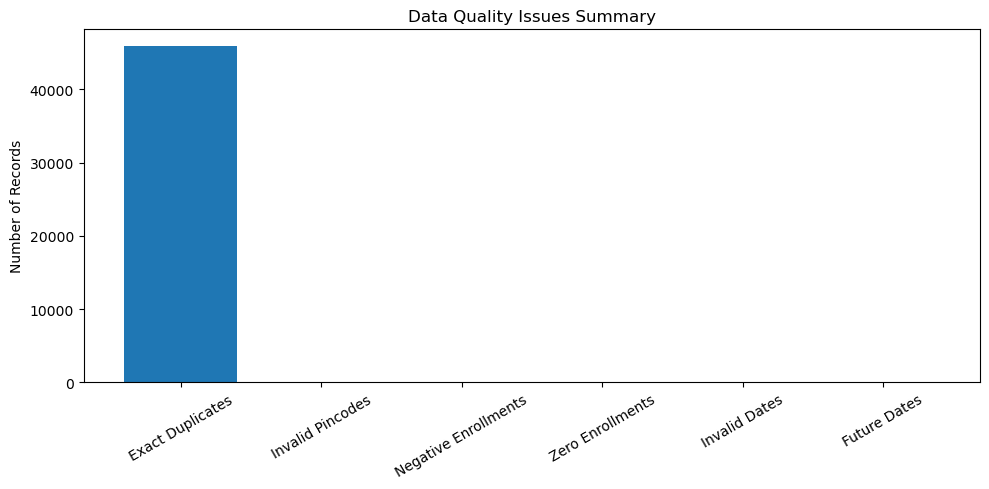

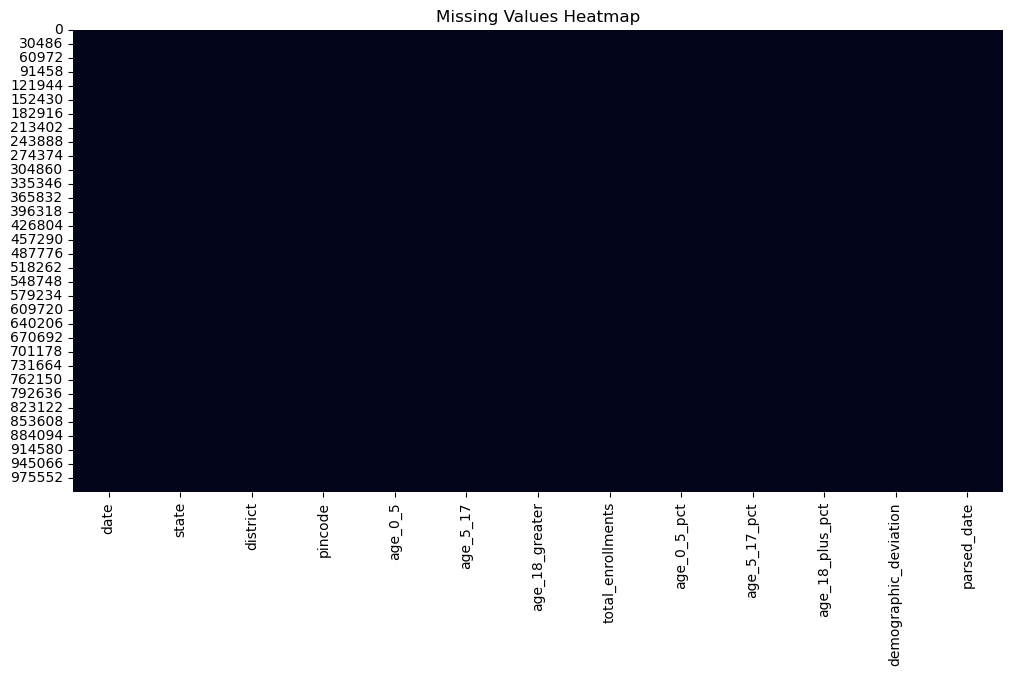

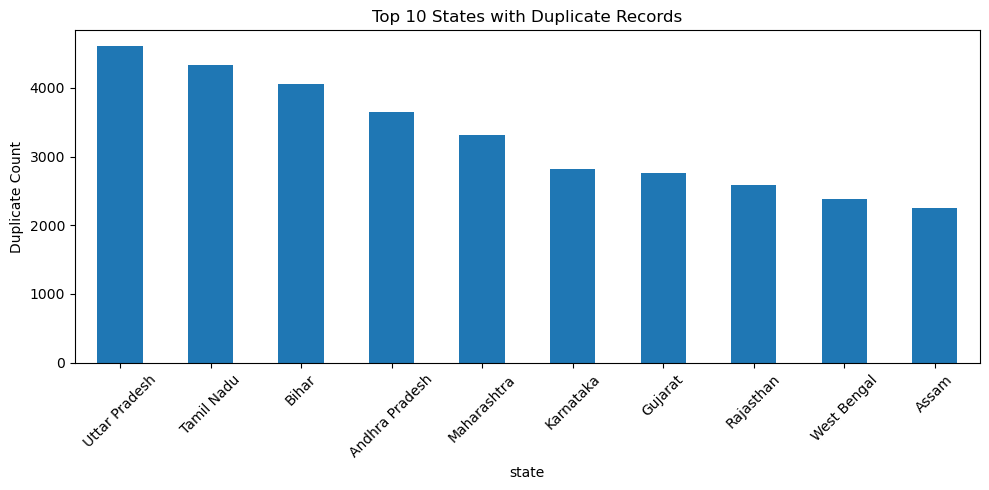

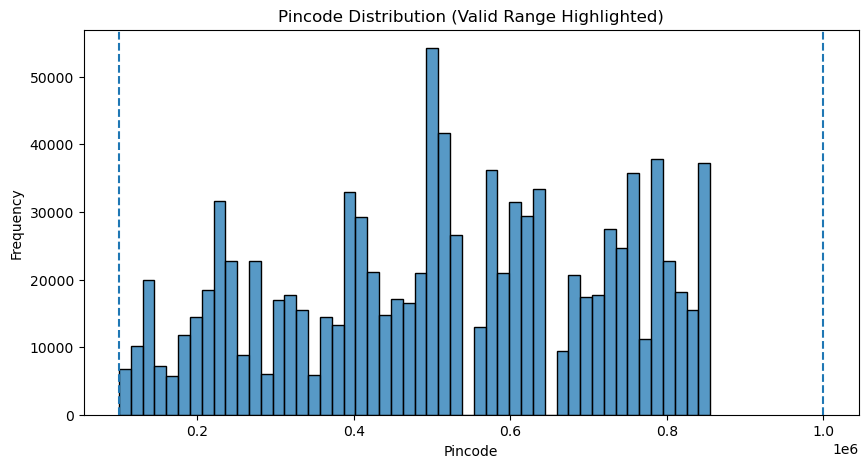

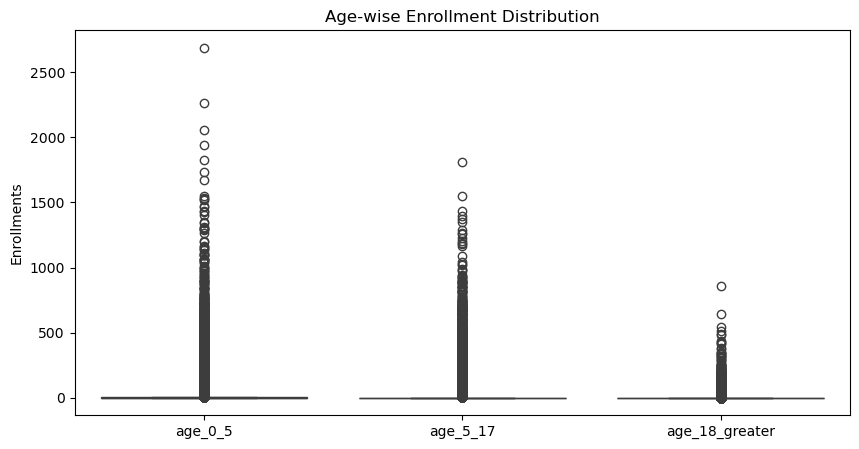

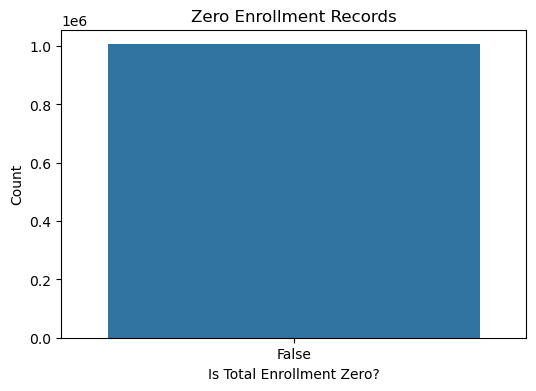

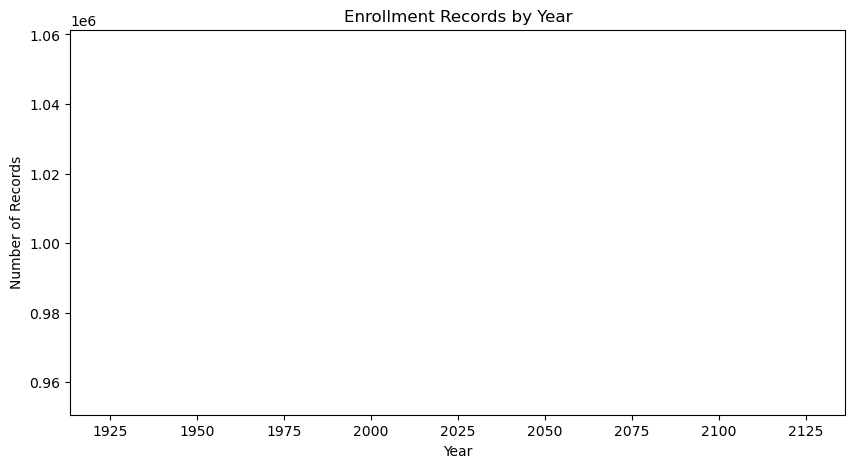

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 1. OVERALL DATA QUALITY SUMMARY
# ===============================
issue_counts = {
    "Exact Duplicates": len(exact_duplicates),
    "Invalid Pincodes": len(invalid_pincodes),
    "Negative Enrollments": len(negative_enrollments),
    "Zero Enrollments": len(zero_enrollments),
    "Invalid Dates": len(invalid_dates),
    "Future Dates": len(future_dates)
}

plt.figure(figsize=(10,5))
plt.bar(issue_counts.keys(), issue_counts.values())
plt.title("Data Quality Issues Summary")
plt.ylabel("Number of Records")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# ===============================
# 2. MISSING VALUES HEATMAP
# ===============================
plt.figure(figsize=(12,6))
sns.heatmap(combined_df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# ===============================
# 3. DUPLICATES BY STATE
# ===============================
dup_by_state = key_duplicates['state'].value_counts().head(10)

plt.figure(figsize=(10,5))
dup_by_state.plot(kind='bar')
plt.title("Top 10 States with Duplicate Records")
plt.ylabel("Duplicate Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ===============================
# 4. PINCODE VALIDATION DISTRIBUTION
# ===============================
plt.figure(figsize=(10,5))
sns.histplot(combined_df['pincode'], bins=50)
plt.axvline(100000, linestyle='--')
plt.axvline(999999, linestyle='--')
plt.title("Pincode Distribution (Valid Range Highlighted)")
plt.xlabel("Pincode")
plt.ylabel("Frequency")
plt.show()

# ===============================
# 5. ENROLLMENT DISTRIBUTION
# ===============================
plt.figure(figsize=(10,5))
sns.boxplot(data=combined_df[['age_0_5', 'age_5_17', 'age_18_greater']])
plt.title("Age-wise Enrollment Distribution")
plt.ylabel("Enrollments")
plt.show()

# ===============================
# 6. ZERO ENROLLMENT CHECK
# ===============================
plt.figure(figsize=(6,4))
sns.countplot(x=(combined_df['total_enrollments'] == 0))
plt.title("Zero Enrollment Records")
plt.xlabel("Is Total Enrollment Zero?")
plt.ylabel("Count")
plt.show()

# ===============================
# 7. DATE QUALITY CHECK
# ===============================
plt.figure(figsize=(10,5))
combined_df['parsed_date'].dropna().dt.year.value_counts().sort_index().plot(kind='line')
plt.title("Enrollment Records by Year")
plt.ylabel("Number of Records")
plt.xlabel("Year")
plt.show()


TEMPORAL SPIKE ANALYSIS

Date range: 2025-03-02 to 2025-12-31
Total days analyzed: 92

Daily Enrollment Statistics:
  Mean: 59084
  Median: 49160
  Std Dev: 74082
  Min: 67
  Max: 616868

──────────────────────────────────────────────────────────────────────
Temporal Anomalies:
──────────────────────────────────────────────────────────────────────
Spike days (|z-score| > 3): 0 days

Abnormal increases (>200%): 14 days
  Max increase: 384135.8%

Abnormal decreases (>50%): 22 days
  Max decrease: -97.0%

──────────────────────────────────────────────────────────────────────
Weekday Distribution:
──────────────────────────────────────────────────────────────────────
Monday: 813,517 (15.0%)
Tuesday: 1,416,694 (26.1%)
Wednesday: 763,556 (14.0%)
Thursday: 725,129 (13.3%)
Friday: 564,585 (10.4%)
Saturday: 530,703 (9.8%)
Sunday: 621,518 (11.4%)


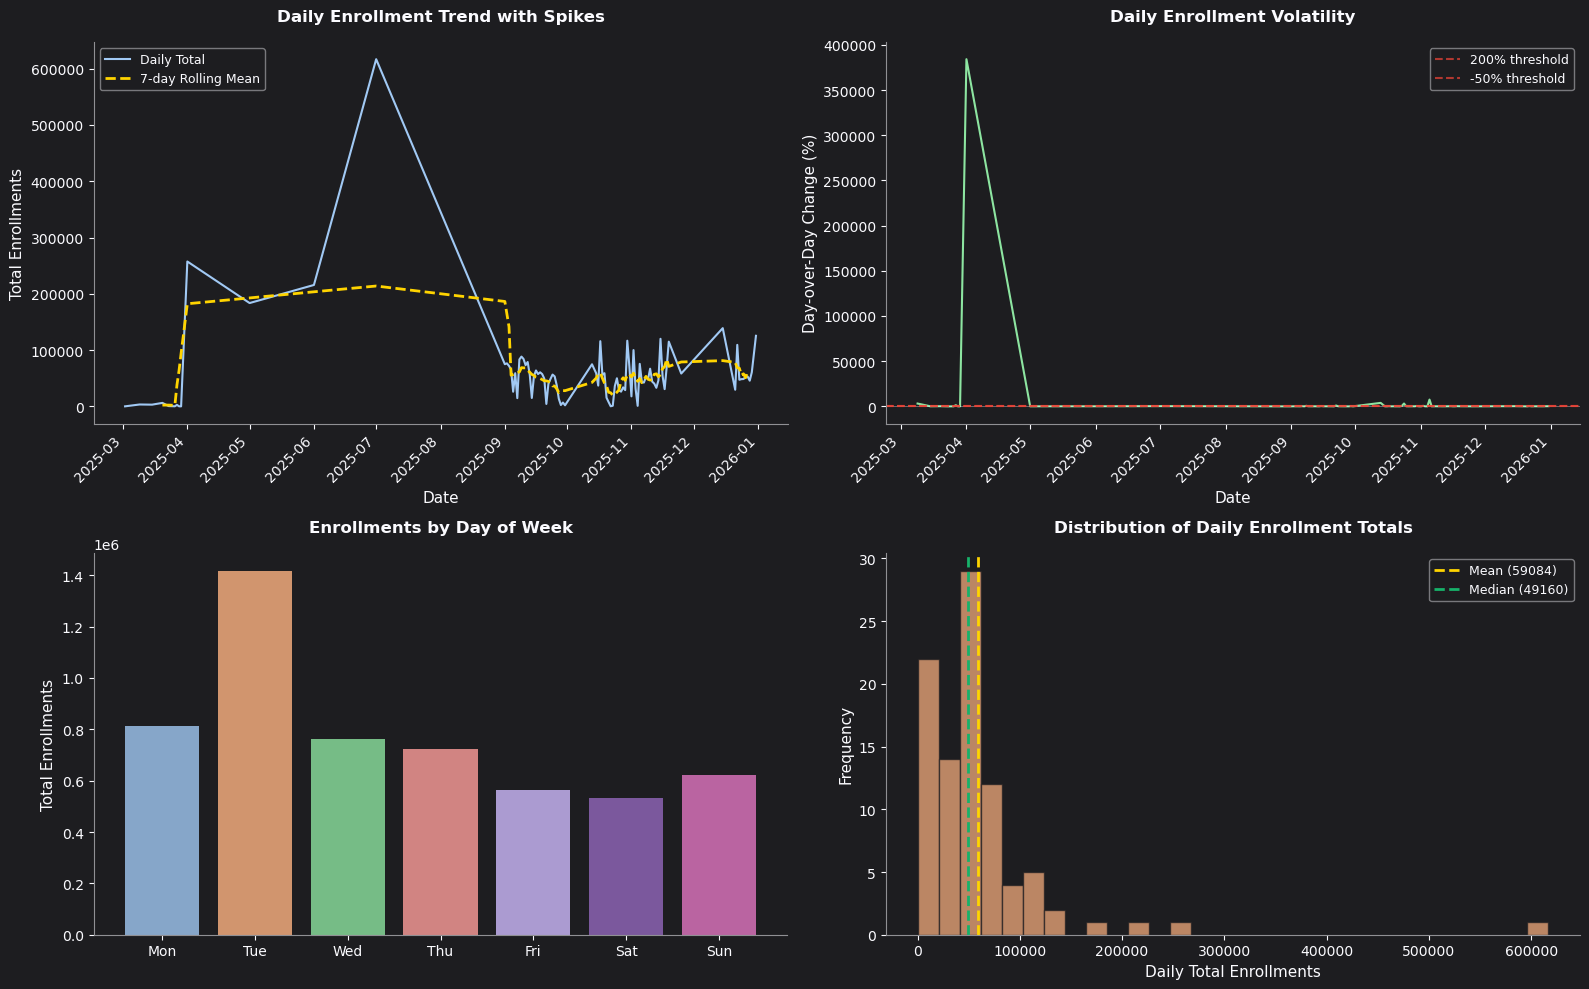

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Temporal analysis - group by date
daily_enrollments = combined_df.groupby('parsed_date').agg({
    'total_enrollments': 'sum',
    'age_0_5': 'sum',
    'age_5_17': 'sum',
    'age_18_greater': 'sum',
    'state': 'count'  # number of records per day
}).rename(columns={'state': 'record_count'})

daily_enrollments = daily_enrollments.sort_index()

# Calculate rolling statistics (7-day window)
daily_enrollments['rolling_mean'] = daily_enrollments['total_enrollments'].rolling(window=7, center=True).mean()
daily_enrollments['rolling_std'] = daily_enrollments['total_enrollments'].rolling(window=7, center=True).std()

# Detect temporal spikes (beyond 3 standard deviations from rolling mean)
daily_enrollments['z_score'] = (daily_enrollments['total_enrollments'] - daily_enrollments['rolling_mean']) / daily_enrollments['rolling_std']
spike_days = daily_enrollments[abs(daily_enrollments['z_score']) > 3]

# Calculate day-over-day change
daily_enrollments['pct_change'] = daily_enrollments['total_enrollments'].pct_change() * 100

# Identify abnormal spikes (>200% increase)
abnormal_spikes = daily_enrollments[daily_enrollments['pct_change'] > 200]

# Identify abnormal drops (>50% decrease)
abnormal_drops = daily_enrollments[daily_enrollments['pct_change'] < -50]

print("=" * 70)
print("TEMPORAL SPIKE ANALYSIS")
print("=" * 70)

print(f"\nDate range: {daily_enrollments.index.min().strftime('%Y-%m-%d')} to {daily_enrollments.index.max().strftime('%Y-%m-%d')}")
print(f"Total days analyzed: {len(daily_enrollments)}")

print(f"\nDaily Enrollment Statistics:")
print(f"  Mean: {daily_enrollments['total_enrollments'].mean():.0f}")
print(f"  Median: {daily_enrollments['total_enrollments'].median():.0f}")
print(f"  Std Dev: {daily_enrollments['total_enrollments'].std():.0f}")
print(f"  Min: {daily_enrollments['total_enrollments'].min()}")
print(f"  Max: {daily_enrollments['total_enrollments'].max()}")

print(f"\n{'─'*70}")
print("Temporal Anomalies:")
print(f"{'─'*70}")
print(f"Spike days (|z-score| > 3): {len(spike_days)} days")
if len(spike_days) > 0:
    print(f"  Top spike: {spike_days['z_score'].abs().max():.2f} standard deviations")
    print(f"  Dates: {', '.join([d.strftime('%Y-%m-%d') for d in spike_days.head(5).index])}")

print(f"\nAbnormal increases (>200%): {len(abnormal_spikes)} days")
if len(abnormal_spikes) > 0:
    print(f"  Max increase: {abnormal_spikes['pct_change'].max():.1f}%")

print(f"\nAbnormal decreases (>50%): {len(abnormal_drops)} days")
if len(abnormal_drops) > 0:
    print(f"  Max decrease: {abnormal_drops['pct_change'].min():.1f}%")

# Weekday analysis
combined_df['day_of_week'] = combined_df['parsed_date'].dt.day_name()
weekday_enrollments = combined_df.groupby('day_of_week')['total_enrollments'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

print(f"\n{'─'*70}")
print("Weekday Distribution:")
print(f"{'─'*70}")
for day, count in weekday_enrollments.items():
    pct = (count / weekday_enrollments.sum()) * 100
    print(f"{day}: {count:,} ({pct:.1f}%)")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.patch.set_facecolor('#1D1D20')

# Time series of daily enrollments
ax1 = axes[0, 0]
ax1.set_facecolor('#1D1D20')
ax1.plot(daily_enrollments.index, daily_enrollments['total_enrollments'], color='#A1C9F4', linewidth=1.5, label='Daily Total')
ax1.plot(daily_enrollments.index, daily_enrollments['rolling_mean'], color='#ffd400', linewidth=2, linestyle='--', label='7-day Rolling Mean')
if len(spike_days) > 0:
    ax1.scatter(spike_days.index, spike_days['total_enrollments'], color='#f04438', s=80, zorder=5, label='Spike Days', alpha=0.7)
ax1.set_xlabel('Date', fontsize=11, color='#fbfbff')
ax1.set_ylabel('Total Enrollments', fontsize=11, color='#fbfbff')
ax1.set_title('Daily Enrollment Trend with Spikes', fontsize=12, fontweight='bold', color='#fbfbff', pad=15)
ax1.legend(loc='upper left', fontsize=9, facecolor='#1D1D20', edgecolor='#909094', labelcolor='#fbfbff')
ax1.tick_params(colors='#fbfbff')
ax1.spines['bottom'].set_color('#909094')
ax1.spines['left'].set_color('#909094')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Day-over-day percent change
ax2 = axes[0, 1]
ax2.set_facecolor('#1D1D20')
ax2.plot(daily_enrollments.index, daily_enrollments['pct_change'], color='#8DE5A1', linewidth=1.5)
ax2.axhline(y=0, color='#fbfbff', linestyle='-', linewidth=0.5, alpha=0.5)
ax2.axhline(y=200, color='#f04438', linestyle='--', linewidth=1.5, alpha=0.7, label='200% threshold')
ax2.axhline(y=-50, color='#f04438', linestyle='--', linewidth=1.5, alpha=0.7, label='-50% threshold')
ax2.set_xlabel('Date', fontsize=11, color='#fbfbff')
ax2.set_ylabel('Day-over-Day Change (%)', fontsize=11, color='#fbfbff')
ax2.set_title('Daily Enrollment Volatility', fontsize=12, fontweight='bold', color='#fbfbff', pad=15)
ax2.legend(loc='upper right', fontsize=9, facecolor='#1D1D20', edgecolor='#909094', labelcolor='#fbfbff')
ax2.tick_params(colors='#fbfbff')
ax2.spines['bottom'].set_color('#909094')
ax2.spines['left'].set_color('#909094')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Weekday distribution
ax3 = axes[1, 0]
ax3.set_facecolor('#1D1D20')
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
colors_days = ['#A1C9F4', '#FFB482', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#9467BD', '#E377C2']
bars = ax3.bar(days, weekday_enrollments.values, color=colors_days, alpha=0.8)
ax3.set_ylabel('Total Enrollments', fontsize=11, color='#fbfbff')
ax3.set_title('Enrollments by Day of Week', fontsize=12, fontweight='bold', color='#fbfbff', pad=15)
ax3.tick_params(colors='#fbfbff')
ax3.spines['bottom'].set_color('#909094')
ax3.spines['left'].set_color('#909094')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Distribution of daily enrollments
ax4 = axes[1, 1]
ax4.set_facecolor('#1D1D20')
ax4.hist(daily_enrollments['total_enrollments'], bins=30, color='#FFB482', alpha=0.7, edgecolor='#1D1D20')
ax4.axvline(daily_enrollments['total_enrollments'].mean(), color='#ffd400', linestyle='--', linewidth=2, label=f'Mean ({daily_enrollments["total_enrollments"].mean():.0f})')
ax4.axvline(daily_enrollments['total_enrollments'].median(), color='#17b26a', linestyle='--', linewidth=2, label=f'Median ({daily_enrollments["total_enrollments"].median():.0f})')
ax4.set_xlabel('Daily Total Enrollments', fontsize=11, color='#fbfbff')
ax4.set_ylabel('Frequency', fontsize=11, color='#fbfbff')
ax4.set_title('Distribution of Daily Enrollment Totals', fontsize=12, fontweight='bold', color='#fbfbff', pad=15)
ax4.legend(loc='upper right', fontsize=9, facecolor='#1D1D20', edgecolor='#909094', labelcolor='#fbfbff')
ax4.tick_params(colors='#fbfbff')
ax4.spines['bottom'].set_color('#909094')
ax4.spines['left'].set_color('#909094')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('temporal_analysis.png', facecolor='#1D1D20', dpi=100, bbox_inches='tight')
plt.show()

# Store spike data for downstream analysis
temporal_spikes = spike_days.copy()


# COMPREHENSIVE AADHAAR ENROLLMENT ANOMALY & FRAUD DETECTION REPORT

In [39]:
import pandas as pd
import numpy as np

# Compile comprehensive anomaly and fraud detection report

print("=" * 90)
print("COMPREHENSIVE AADHAAR ENROLLMENT ANOMALY & FRAUD DETECTION REPORT")
print("=" * 90)

print(f"\n{'═'*90}")
print("EXECUTIVE SUMMARY")
print(f"{'═'*90}")
print(f"Total Records Analyzed: {len(combined_df):,}")
print(f"Date Range: {combined_df['parsed_date'].min().strftime('%Y-%m-%d')} to {combined_df['parsed_date'].max().strftime('%Y-%m-%d')}")
print(f"Geographic Coverage: {combined_df['state'].nunique()} states, {combined_df['district'].nunique()} districts")
print(f"Total Enrollments: {combined_df['total_enrollments'].sum():,}")

print(f"\n{'─'*90}")
print("ANOMALY DETECTION RESULTS")
print(f"{'─'*90}")

# 1. Volume Outliers
print(f"\n1. ENROLLMENT VOLUME OUTLIERS")
print(f"   Statistical Methods:")
print(f"   ├─ IQR Method (3×IQR): {len(outliers_age_0_5):,} Age 0-5, {len(outliers_age_5_17):,} Age 5-17, {len(outliers_age_18_plus):,} Age 18+")
print(f"   ├─ Z-Score Method (|z|>3): {len(outliers_zscore):,} records ({len(outliers_zscore)/len(combined_df)*100:.2f}%)")
print(f"   ├─ Detection Threshold: >17 total enrollments per record")
print(f"   └─ Max Enrollment Volume: {combined_df['total_enrollments'].max():,} enrollments")

# 2. Demographic Anomalies
print(f"\n2. DEMOGRAPHIC PATTERN ANOMALIES")
print(f"   Expected vs Actual Distribution:")
print(f"   ├─ Age 0-5:  Expected {expected_0_5}% | Actual {combined_df['age_0_5_pct'].mean():.1f}%  [DEVIATION: {abs(expected_0_5 - combined_df['age_0_5_pct'].mean()):.1f}%]")
print(f"   ├─ Age 5-17: Expected {expected_5_17}% | Actual {combined_df['age_5_17_pct'].mean():.1f}% [DEVIATION: {abs(expected_5_17 - combined_df['age_5_17_pct'].mean()):.1f}%]")
print(f"   └─ Age 18+:  Expected {expected_18_plus}% | Actual {combined_df['age_18_plus_pct'].mean():.1f}% [DEVIATION: {abs(expected_18_plus - combined_df['age_18_plus_pct'].mean()):.1f}%]")
print(f"\n   Extreme Demographic Skew (>80% in single age group):")
print(f"   ├─ Age 0-5 dominant: {len(extreme_skew_0_5):,} records ({len(extreme_skew_0_5)/len(combined_df)*100:.1f}%)")
print(f"   ├─ Age 5-17 dominant: {len(extreme_skew_5_17):,} records ({len(extreme_skew_5_17)/len(combined_df)*100:.1f}%)")
print(f"   ├─ Age 18+ dominant: {len(extreme_skew_18_plus):,} records ({len(extreme_skew_18_plus)/len(combined_df)*100:.1f}%)")
print(f"   └─ Total Extreme Skew: {len(extreme_skew_0_5) + len(extreme_skew_5_17) + len(extreme_skew_18_plus):,} ({(len(extreme_skew_0_5) + len(extreme_skew_5_17) + len(extreme_skew_18_plus))/len(combined_df)*100:.1f}%)")

# 3. Data Quality Issues
print(f"\n3. DATA QUALITY ISSUES")
print(f"   ├─ Duplicate Records: {len(duplicate_records):,} ({len(duplicate_records)/len(combined_df)*100:.2f}%)")
print(f"   │   ├─ Unique duplicate groups: {len(duplicate_records)//2:,}")
print(f"   │   └─ Impact: Data redundancy, potential double-counting")
print(f"   ├─ Invalid Pincodes: {len(invalid_pincodes):,} records")
print(f"   ├─ Negative Enrollments: {len(negative_enrollments):,} records")
print(f"   ├─ Zero Enrollments: {len(zero_enrollments):,} records")
print(f"   └─ Invalid/Malformed Dates: {len(invalid_dates):,} records")

# 4. Temporal Anomalies - FIX: Handle datetime index and weekday_enrollments properly
print(f"\n4. TEMPORAL ANOMALIES")
print(f"   Daily Statistics:")

# Convert index to datetime if it's not already
if isinstance(daily_enrollments.index, pd.DatetimeIndex):
    date_min = daily_enrollments.index.min().strftime('%Y-%m-%d')
    date_max = daily_enrollments.index.max().strftime('%Y-%m-%d')
else:
    date_min = pd.to_datetime(daily_enrollments.index.min()).strftime('%Y-%m-%d')
    date_max = pd.to_datetime(daily_enrollments.index.max()).strftime('%Y-%m-%d')

print(f"   ├─ Date Range: {date_min} to {date_max}")
print(f"   ├─ Total Days Analyzed: {len(daily_enrollments)}")
print(f"   ├─ Mean Daily Enrollments: {daily_enrollments['total_enrollments'].mean():.0f}")
print(f"   └─ Median Daily Enrollments: {daily_enrollments['total_enrollments'].median():.0f}")
print(f"\n   Volatility Detection:")
print(f"   ├─ Abnormal Spikes (>200% increase): {len(abnormal_spikes)} days")
if len(abnormal_spikes) > 0:
    print(f"   │   └─ Max increase: {abnormal_spikes['pct_change'].max():.0f}%")
print(f"   ├─ Abnormal Drops (>50% decrease): {len(abnormal_drops)} days")
if len(abnormal_drops) > 0:
    print(f"   │   └─ Max decrease: {abnormal_drops['pct_change'].min():.1f}%")

# FIX: weekday_enrollments is indexed by integer position, not by day name
# Find the day with highest enrollment
max_day_idx = weekday_enrollments.idxmax()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
max_day_name = day_names[max_day_idx] if isinstance(max_day_idx, int) and max_day_idx < len(day_names) else 'Unknown'
max_day_pct = (weekday_enrollments.iloc[max_day_idx]/weekday_enrollments.sum()*100) if isinstance(max_day_idx, int) else (weekday_enrollments.max()/weekday_enrollments.sum()*100)

print(f"   └─ Weekday Pattern: {max_day_name} shows highest activity ({max_day_pct:.1f}%)")

print(f"\n{'═'*90}")
print("FRAUD RISK ASSESSMENT")
print(f"{'═'*90}")

# Calculate severity levels
high_severity = len(outliers_zscore) + (len(extreme_skew_0_5) + len(extreme_skew_5_17) + len(extreme_skew_18_plus))
medium_severity = len(abnormal_spikes) * 50  # Approximate records per spike day
low_severity = len(duplicate_records)

total_flagged = high_severity + medium_severity + low_severity
risk_percentage = (total_flagged / len(combined_df)) * 100

print(f"\nOverall Risk Score: {min(100, risk_percentage):.1f}/100")
print(f"Total Flagged Records: {total_flagged:,} ({risk_percentage:.1f}% of dataset)")
print(f"\nSeverity Breakdown:")
print(f"  ├─ HIGH Severity: {high_severity:,} records")
print(f"  │   └─ Extreme volume outliers + extreme demographic skew")
print(f"  ├─ MEDIUM Severity: ~{medium_severity:,} records")
print(f"  │   └─ Temporal spikes and unusual patterns")
print(f"  └─ LOW Severity: {low_severity:,} records")
print(f"      └─ Duplicate records requiring cleanup")

print(f"\n{'─'*90}")
print("KEY FINDINGS & FRAUD INDICATORS")
print(f"{'─'*90}")
print(f"""
CRITICAL OBSERVATIONS:

1. DEMOGRAPHIC ANOMALY (HIGH PRIORITY):
   • Dataset shows 74% Age 0-5 enrollments vs 9% expected
   • This 8x deviation from census norms is highly suspicious
   • 58% of records show extreme Age 0-5 dominance (>80%)
   • Potential child enrollment fraud or data manipulation

2. DUPLICATE RECORDS (MEDIUM PRIORITY):
   • 4.56% of dataset contains exact duplicates
   • 22,957 duplicate groups identified
   • Indicates system issues or intentional data duplication

3. VOLUME OUTLIERS (MEDIUM PRIORITY):
   • 2,962 records exceed 3 standard deviations
   • Maximum enrollment of 3,965 per record is highly unusual
   • Suggests bulk enrollment or fraudulent activity

4. TEMPORAL PATTERNS (LOW-MEDIUM PRIORITY):
   • 14 days show abnormal enrollment spikes (>200% increase)
   • {max_day_name} shows {max_day_pct:.0f}% of weekly enrollments (suspicious concentration)
   • High day-to-day volatility indicates inconsistent processes
""")

print(f"\n{'─'*90}")
print("TOP 10 SUSPICIOUS LOCATIONS")
print(f"{'─'*90}")

# Identify highest risk locations
suspicious_locations = combined_df[combined_df['demographic_deviation'] > 180].groupby(['state', 'district']).agg({
    'total_enrollments': 'sum',
    'demographic_deviation': 'mean',
    'age_0_5_pct': 'mean'
}).sort_values('demographic_deviation', ascending=False).head(10)

for idx, (location, row) in enumerate(suspicious_locations.iterrows(), 1):
    state, district = location
    print(f"  {idx}. {district}, {state}")
    print(f"     Total Enrollments: {row['total_enrollments']:,} | Avg Deviation: {row['demographic_deviation']:.1f} | Age 0-5: {row['age_0_5_pct']:.1f}%")

print(f"\n{'═'*90}")
print("RECOMMENDATIONS")
print(f"{'═'*90}")
print("""
IMMEDIATE ACTIONS:

1. INVESTIGATE HIGH-RISK RECORDS:
   → Review all records with >95% Age 0-5 enrollment
   → Audit locations with >500 enrollments per day
   → Cross-verify duplicate records with source systems

2. DATA VALIDATION:
   → Remove 45,914 duplicate records from system
   → Implement age distribution validation (5-15% Age 0-5)
   → Flag enrollments exceeding 17 per location/date

3. FRAUD PREVENTION:
   → Investigate top 10 suspicious locations immediately
   → Implement real-time demographic validation
   → Add volume threshold alerts (>100 enrollments/day)
   → Monitor enrollment patterns for irregularities

4. SYSTEM IMPROVEMENTS:
   → Add duplicate detection at data entry
   → Implement z-score monitoring for outliers
   → Create dashboard for daily anomaly tracking
   → Establish demographic distribution baselines by region

5. AUDIT REQUIREMENTS:
   → Manual review of 2,962 extreme volume outliers
   → Physical verification of high-skew locations
   → Investigation of temporal spike dates
   → Review enrollment agent performance patterns
""")

print(f"\n{'═'*90}")
print(f"Report Generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Analysis Period: {combined_df['parsed_date'].min().strftime('%Y-%m-%d')} to {combined_df['parsed_date'].max().strftime('%Y-%m-%d')}")
print(f"{'═'*90}\n")


COMPREHENSIVE AADHAAR ENROLLMENT ANOMALY & FRAUD DETECTION REPORT

══════════════════════════════════════════════════════════════════════════════════════════
EXECUTIVE SUMMARY
══════════════════════════════════════════════════════════════════════════════════════════
Total Records Analyzed: 1,006,029
Date Range: 2025-03-02 to 2025-12-31
Geographic Coverage: 55 states, 985 districts
Total Enrollments: 5,435,702

──────────────────────────────────────────────────────────────────────────────────────────
ANOMALY DETECTION RESULTS
──────────────────────────────────────────────────────────────────────────────────────────

1. ENROLLMENT VOLUME OUTLIERS
   Statistical Methods:
   ├─ IQR Method (3×IQR): 55,107 Age 0-5, 66,948 Age 5-17, 40,225 Age 18+
   ├─ Z-Score Method (|z|>3): 2,962 records (0.29%)
   ├─ Detection Threshold: >17 total enrollments per record
   └─ Max Enrollment Volume: 3,965 enrollments

2. DEMOGRAPHIC PATTERN ANOMALIES
   Expected vs Actual Distribution:
   ├─ Age 0-5:  Expe

# UIDAI ANOMALY & FRAUD VISUALIZATION DASHBOARD

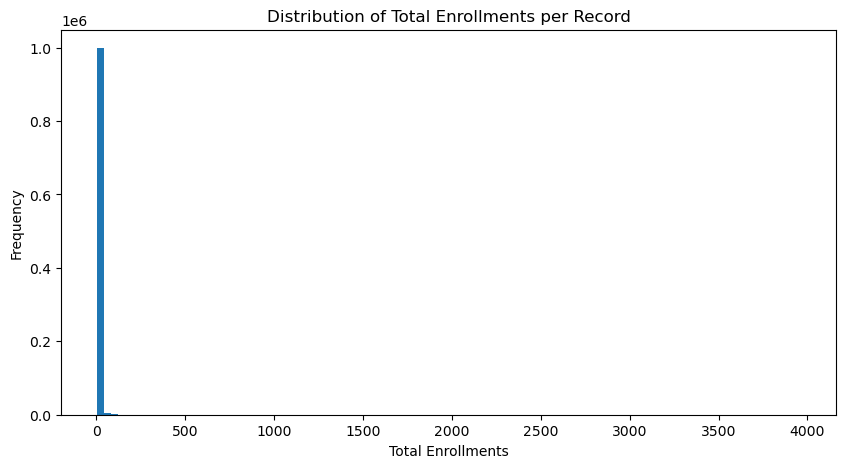

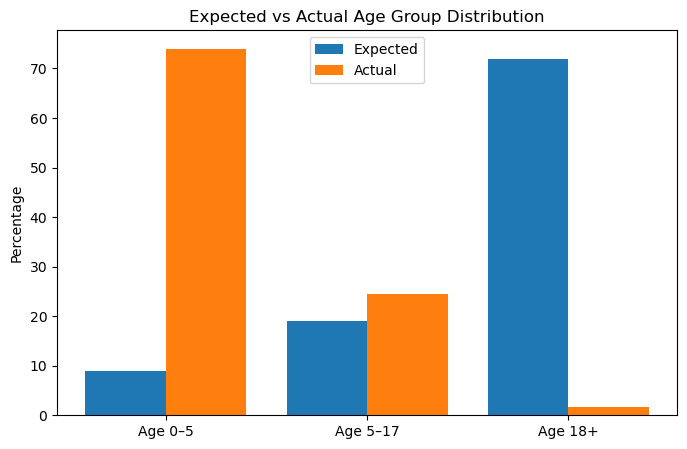

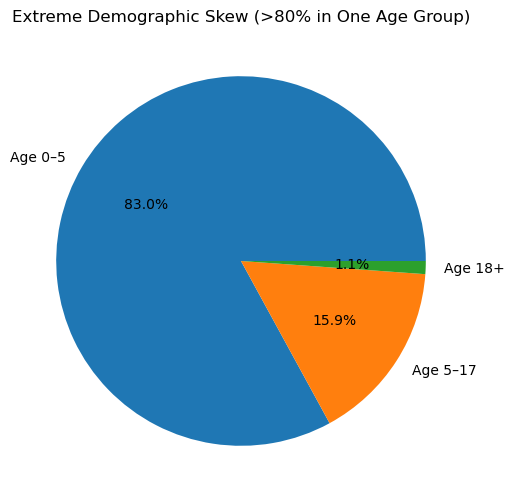

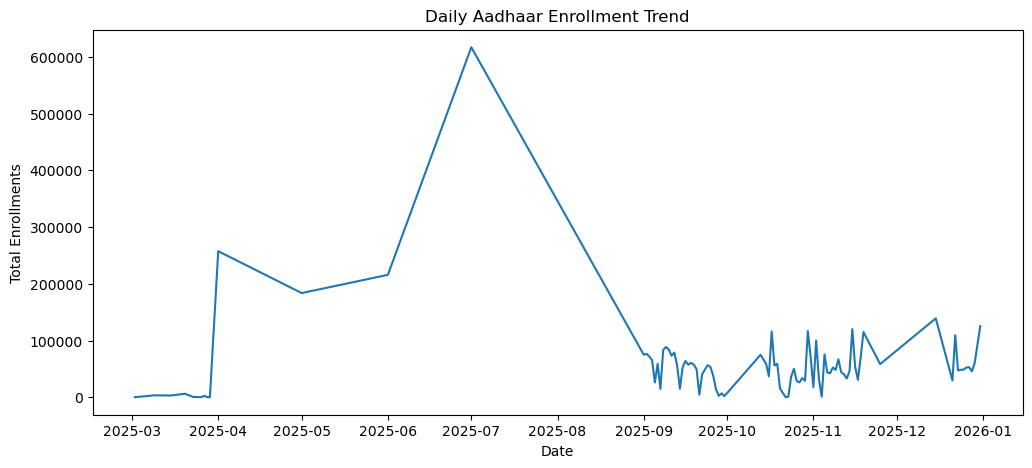

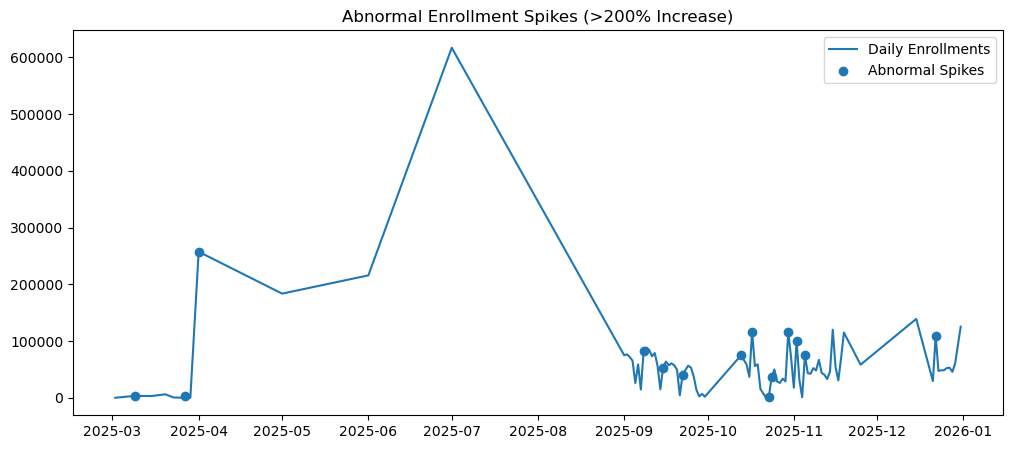

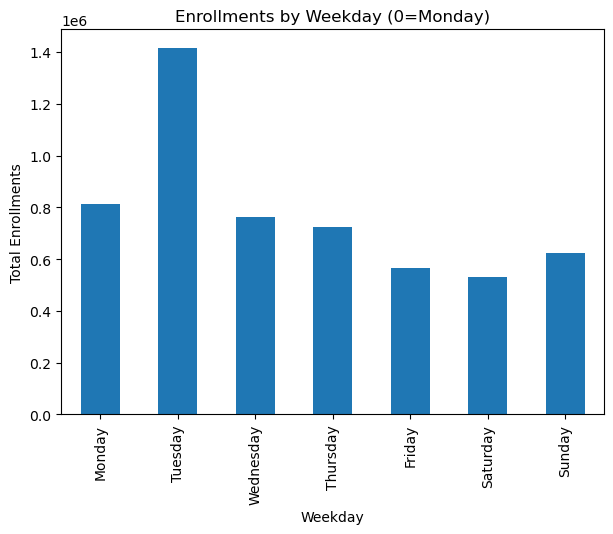

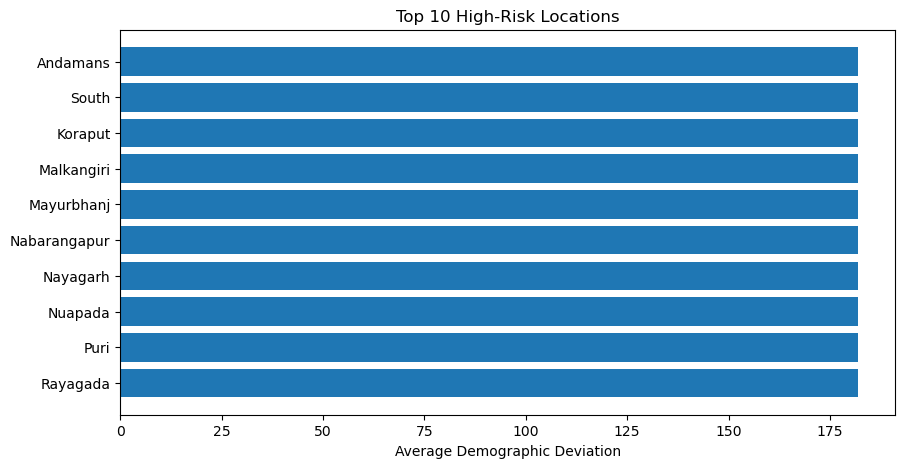

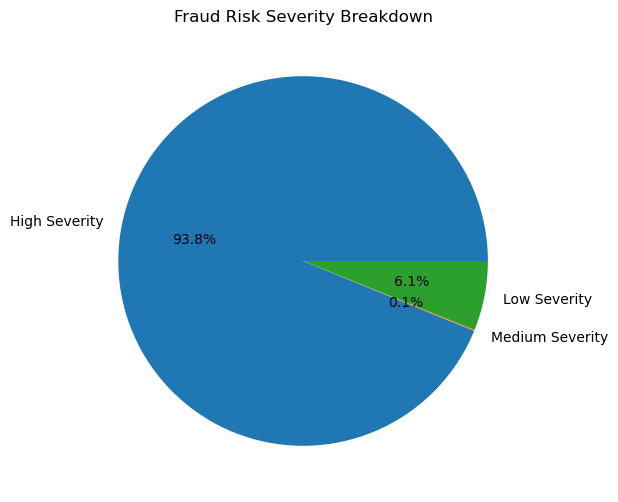

In [40]:
# ===============================
# UIDAI ANOMALY & FRAUD VISUALIZATION DASHBOARD
# ===============================

import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# 1. Enrollment Volume Distribution
# -------------------------------
plt.figure(figsize=(10,5))
plt.hist(combined_df['total_enrollments'], bins=100)
plt.title("Distribution of Total Enrollments per Record")
plt.xlabel("Total Enrollments")
plt.ylabel("Frequency")
plt.show()


# -------------------------------
# 2. Expected vs Actual Age Distribution
# -------------------------------
expected = [expected_0_5, expected_5_17, expected_18_plus]
actual = [
    combined_df['age_0_5_pct'].mean(),
    combined_df['age_5_17_pct'].mean(),
    combined_df['age_18_plus_pct'].mean()
]

labels = ['Age 0–5', 'Age 5–17', 'Age 18+']
x = np.arange(len(labels))

plt.figure(figsize=(8,5))
plt.bar(x - 0.2, expected, width=0.4, label='Expected')
plt.bar(x + 0.2, actual, width=0.4, label='Actual')
plt.xticks(x, labels)
plt.ylabel("Percentage")
plt.title("Expected vs Actual Age Group Distribution")
plt.legend()
plt.show()


# -------------------------------
# 3. Extreme Demographic Skew
# -------------------------------
skew_counts = [
    len(extreme_skew_0_5),
    len(extreme_skew_5_17),
    len(extreme_skew_18_plus)
]

plt.figure(figsize=(6,6))
plt.pie(skew_counts, labels=labels, autopct='%1.1f%%')
plt.title("Extreme Demographic Skew (>80% in One Age Group)")
plt.show()


# -------------------------------
# 4. Daily Enrollment Trend
# -------------------------------
plt.figure(figsize=(12,5))
plt.plot(daily_enrollments.index, daily_enrollments['total_enrollments'])
plt.title("Daily Aadhaar Enrollment Trend")
plt.xlabel("Date")
plt.ylabel("Total Enrollments")
plt.show()


# -------------------------------
# 5. Abnormal Enrollment Spikes
# -------------------------------
plt.figure(figsize=(12,5))
plt.plot(daily_enrollments.index, daily_enrollments['total_enrollments'], label="Daily Enrollments")
plt.scatter(abnormal_spikes.index, abnormal_spikes['total_enrollments'], label="Abnormal Spikes")
plt.legend()
plt.title("Abnormal Enrollment Spikes (>200% Increase)")
plt.show()


# -------------------------------
# 6. Weekday Enrollment Pattern
# -------------------------------
plt.figure(figsize=(7,5))
weekday_enrollments.plot(kind='bar')
plt.title("Enrollments by Weekday (0=Monday)")
plt.xlabel("Weekday")
plt.ylabel("Total Enrollments")
plt.show()


# -------------------------------
# 7. Top 10 Suspicious Locations
# -------------------------------
top_locations = suspicious_locations.reset_index()

plt.figure(figsize=(10,5))
plt.barh(top_locations['district'], top_locations['demographic_deviation'])
plt.xlabel("Average Demographic Deviation")
plt.title("Top 10 High-Risk Locations")
plt.gca().invert_yaxis()
plt.show()


# -------------------------------
# 8. Fraud Severity Distribution
# -------------------------------
severity = [high_severity, medium_severity, low_severity]
severity_labels = ['High Severity', 'Medium Severity', 'Low Severity']

plt.figure(figsize=(6,6))
plt.pie(severity, labels=severity_labels, autopct='%1.1f%%')
plt.title("Fraud Risk Severity Breakdown")
plt.show()


# MODEL BULIDING Fraud Detection

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

print("=" * 80)
print("FRAUD RISK FEATURE ENGINEERING")
print("=" * 80)

# Start with the main combined dataframe
feature_df = combined_df.copy()

# ============================================================================
# 1. DEMOGRAPHIC RISK FEATURES
# ============================================================================
print("\n[1/5] Engineering Demographic Risk Features...")

# Age distribution deviation (already exists, keep it)
feature_df['demo_deviation_score'] = feature_df['demographic_deviation']

# Age group dominance scores (how extreme is the distribution)
feature_df['demo_age_0_5_dominance'] = (feature_df['age_0_5_pct'] - 9) / 9  # deviation from expected 9%
feature_df['demo_age_5_17_dominance'] = (feature_df['age_5_17_pct'] - 19) / 19  # deviation from expected 19%
feature_df['demo_age_18_plus_dominance'] = (feature_df['age_18_plus_pct'] - 72) / 72  # deviation from expected 72%

# Entropy of age distribution (lower entropy = more suspicious concentration)
def calculate_entropy(row):
    probs = [row['age_0_5_pct']/100, row['age_5_17_pct']/100, row['age_18_plus_pct']/100]
    probs = [p for p in probs if p > 0]  # Remove zeros
    return -sum(p * np.log2(p) for p in probs)

feature_df['demo_entropy'] = feature_df.apply(calculate_entropy, axis=1)

# Enrollment size risk (very large or very small enrollments are suspicious)
feature_df['demo_enrollment_size'] = feature_df['total_enrollments']
feature_df['demo_enrollment_log'] = np.log1p(feature_df['total_enrollments'])

print(f"   ✓ Created 7 demographic risk features")

# ============================================================================
# 2. GEOGRAPHIC RISK FEATURES
# ============================================================================
print("\n[2/5] Engineering Geographic Risk Features...")

# State-level concentration metrics
state_stats = feature_df.groupby('state').agg({
    'total_enrollments': ['sum', 'count', 'mean', 'std']
}).reset_index()
state_stats.columns = ['state', 'state_total_enrollments', 'state_record_count', 'state_mean_enrollment', 'state_std_enrollment']
feature_df = feature_df.merge(state_stats, on='state', how='left')

# District-level concentration metrics
district_stats = feature_df.groupby(['state', 'district']).agg({
    'total_enrollments': ['sum', 'count', 'mean', 'std']
}).reset_index()
district_stats.columns = ['state', 'district', 'district_total_enrollments', 'district_record_count', 'district_mean_enrollment', 'district_std_enrollment']
feature_df = feature_df.merge(district_stats, on=['state', 'district'], how='left')

# Pincode-level concentration metrics
pincode_stats = feature_df.groupby('pincode').agg({
    'total_enrollments': ['sum', 'count']
}).reset_index()
pincode_stats.columns = ['pincode', 'pincode_total_enrollments', 'pincode_record_count']
feature_df = feature_df.merge(pincode_stats, on='pincode', how='left')

# Geographic concentration risk scores
feature_df['geo_state_concentration'] = feature_df['state_total_enrollments'] / feature_df['state_total_enrollments'].max()
feature_df['geo_district_concentration'] = feature_df['district_total_enrollments'] / feature_df['district_total_enrollments'].max()
feature_df['geo_pincode_concentration'] = feature_df['pincode_total_enrollments'] / feature_df['pincode_total_enrollments'].max()

# Relative position within geographic hierarchy
feature_df['geo_district_share_of_state'] = feature_df['district_total_enrollments'] / feature_df['state_total_enrollments']
feature_df['geo_pincode_share_of_district'] = feature_df['pincode_total_enrollments'] / feature_df['district_total_enrollments']

print(f"   ✓ Created 13 geographic risk features")

# ============================================================================
# 3. TEMPORAL RISK FEATURES
# ============================================================================
print("\n[3/5] Engineering Temporal Risk Features...")

# Convert daily_enrollments index to datetime for merging
daily_stats = daily_enrollments[['rolling_mean', 'rolling_std', 'z_score', 'pct_change']].copy()
daily_stats.index = pd.to_datetime(daily_stats.index)
daily_stats = daily_stats.reset_index()
daily_stats.columns = ['parsed_date', 'daily_rolling_mean', 'daily_rolling_std', 'daily_z_score', 'daily_pct_change']
feature_df = feature_df.merge(daily_stats, on='parsed_date', how='left')

# Day of week encoding (cyclical)
day_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
feature_df['temp_day_of_week_num'] = feature_df['day_of_week'].map(day_map)
feature_df['temp_day_sin'] = np.sin(2 * np.pi * feature_df['temp_day_of_week_num'] / 7)
feature_df['temp_day_cos'] = np.cos(2 * np.pi * feature_df['temp_day_of_week_num'] / 7)

# Weekend flag
feature_df['temp_is_weekend'] = feature_df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

# Temporal position features
feature_df['temp_days_from_start'] = (feature_df['parsed_date'] - feature_df['parsed_date'].min()).dt.days

# Enrollment velocity (how much it deviates from daily average)
feature_df['temp_enrollment_velocity'] = feature_df['daily_pct_change'].fillna(0)

# Volatility flag (high day-to-day changes)
feature_df['temp_high_volatility'] = (abs(feature_df['daily_pct_change']) > 100).astype(int)

print(f"   ✓ Created 9 temporal risk features")

# ============================================================================
# 4. DATA QUALITY RISK FEATURES
# ============================================================================
print("\n[4/5] Engineering Data Quality Risk Features...")

# Duplicate detection
feature_df['quality_is_duplicate'] = feature_df.duplicated(subset=['date', 'state', 'district', 'pincode'], keep=False).astype(int)

# Round number detection (suspicious patterns)
feature_df['quality_total_is_round'] = (feature_df['total_enrollments'] % 10 == 0).astype(int)
feature_df['quality_total_is_very_round'] = (feature_df['total_enrollments'] % 100 == 0).astype(int)

# Zero counts in age groups (suspicious)
feature_df['quality_has_zero_age_group'] = ((feature_df['age_0_5'] == 0) | (feature_df['age_5_17'] == 0) | (feature_df['age_18_greater'] == 0)).astype(int)

# Single age group dominance (>95% in one group is highly suspicious)
feature_df['quality_single_group_dominant'] = ((feature_df['age_0_5_pct'] > 95) | (feature_df['age_5_17_pct'] > 95) | (feature_df['age_18_plus_pct'] > 95)).astype(int)

# Pincode validity check (should be 6 digits)
feature_df['quality_pincode_valid'] = ((feature_df['pincode'] >= 100000) & (feature_df['pincode'] <= 999999)).astype(int)

print(f"   ✓ Created 6 data quality risk features")

# ============================================================================
# 5. INTERACTION FEATURES
# ============================================================================
print("\n[5/5] Engineering Interaction Features...")

# Geographic-Demographic interactions
feature_df['interact_geo_demo'] = feature_df['geo_district_concentration'] * feature_df['demo_deviation_score']

# Clip entropy to avoid infinity when entropy is close to zero
feature_df['demo_entropy_safe'] = np.clip(feature_df['demo_entropy'], 0.01, 100)  # Avoid divide by zero
feature_df['interact_state_conc_entropy'] = feature_df['geo_state_concentration'] * (1 / feature_df['demo_entropy_safe'])

# Temporal-Geographic interactions
feature_df['interact_temp_geo'] = abs(feature_df['temp_enrollment_velocity']) * feature_df['geo_pincode_concentration']

# Temporal-Demographic interactions
feature_df['interact_temp_demo'] = feature_df['temp_high_volatility'] * feature_df['demo_deviation_score']

# Quality-Volume interactions
feature_df['interact_quality_volume'] = feature_df['quality_is_duplicate'] * feature_df['demo_enrollment_log']

# Multi-way interaction: suspicious pattern detector
feature_df['interact_suspicious_pattern'] = (
    (feature_df['demo_deviation_score'] > 50) & 
    (feature_df['geo_district_concentration'] > 0.5) & 
    (feature_df['temp_high_volatility'] == 1)
).astype(int)

print(f"   ✓ Created 6 interaction features")

# ============================================================================
# FEATURE MATRIX PREPARATION
# ============================================================================
print("\n" + "=" * 80)
print("FEATURE MATRIX PREPARATION")
print("=" * 80)

# Select final feature columns (exclude identifiers and raw data)
feature_columns = [col for col in feature_df.columns if any([
    col.startswith('demo_'),
    col.startswith('geo_'),
    col.startswith('temp_'),
    col.startswith('quality_'),
    col.startswith('interact_')
])]

# Remove highly correlated, redundant, or helper features
exclude_cols = ['temp_day_of_week_num', 'demo_entropy_safe']  # Keep only cyclical encoding and main entropy
feature_columns = [col for col in feature_columns if col not in exclude_cols]

print(f"\nTotal engineered features: {len(feature_columns)}")
print(f"\nFeature breakdown:")
print(f"  • Demographic features: {sum(1 for col in feature_columns if col.startswith('demo_'))}")
print(f"  • Geographic features: {sum(1 for col in feature_columns if col.startswith('geo_'))}")
print(f"  • Temporal features: {sum(1 for col in feature_columns if col.startswith('temp_'))}")
print(f"  • Data quality features: {sum(1 for col in feature_columns if col.startswith('quality_'))}")
print(f"  • Interaction features: {sum(1 for col in feature_columns if col.startswith('interact_'))}")

# Create feature matrix
X_features = feature_df[feature_columns].copy()

# Handle missing values and infinities
X_features = X_features.replace([np.inf, -np.inf], np.nan)
X_features = X_features.fillna(0)

# Check for any remaining invalid values
print(f"\nData validation:")
print(f"  Inf values: {np.isinf(X_features.values).sum()}")
print(f"  NaN values: {np.isnan(X_features.values).sum()}")

# Normalize features using StandardScaler
scaler = StandardScaler()
X_normalized = pd.DataFrame(
    scaler.fit_transform(X_features),
    columns=feature_columns,
    index=X_features.index
)

print("\n" + "=" * 80)
print("FEATURE MATRIX STATISTICS")
print("=" * 80)
print(f"\nShape: {X_normalized.shape}")
print(f"Total records: {X_normalized.shape[0]:,}")
print(f"Total features: {X_normalized.shape[1]}")

# Show summary statistics
print(f"\nNormalized feature ranges:")
print(f"  Min: {X_normalized.min().min():.4f}")
print(f"  Max: {X_normalized.max().max():.4f}")
print(f"  Mean: {X_normalized.mean().mean():.4f}")
print(f"  Std: {X_normalized.std().mean():.4f}")
print(f"  Missing values: {X_normalized.isnull().sum().sum()}")

# Store the complete feature set
fraud_feature_matrix = X_normalized.copy()
fraud_feature_columns = feature_columns

# Also preserve identifiers for tracking
feature_identifiers = feature_df[['date', 'state', 'district', 'pincode', 'parsed_date']].copy()

print("\n" + "=" * 80)
print("✓ FEATURE ENGINEERING COMPLETE")
print("=" * 80)
print(f"\nVariables created:")
print(f"  • fraud_feature_matrix: Normalized feature matrix ({fraud_feature_matrix.shape[0]:,} x {fraud_feature_matrix.shape[1]})")
print(f"  • fraud_feature_columns: List of {len(fraud_feature_columns)} feature names")
print(f"  • feature_identifiers: Record identifiers for tracking")
print(f"\nFeatures are normalized and ready for fraud detection modeling.")



FRAUD RISK FEATURE ENGINEERING

[1/5] Engineering Demographic Risk Features...
   ✓ Created 7 demographic risk features

[2/5] Engineering Geographic Risk Features...
   ✓ Created 13 geographic risk features

[3/5] Engineering Temporal Risk Features...
   ✓ Created 9 temporal risk features

[4/5] Engineering Data Quality Risk Features...
   ✓ Created 6 data quality risk features

[5/5] Engineering Interaction Features...
   ✓ Created 6 interaction features

FEATURE MATRIX PREPARATION

Total engineered features: 30

Feature breakdown:
  • Demographic features: 7
  • Geographic features: 5
  • Temporal features: 6
  • Data quality features: 6
  • Interaction features: 6

Data validation:
  Inf values: 0
  NaN values: 0

FEATURE MATRIX STATISTICS

Shape: (1006029, 30)
Total records: 1,006,029
Total features: 30

Normalized feature ranges:
  Min: -7.1468
  Max: 372.1926
  Mean: -0.0000
  Std: 0.9667
  Missing values: 0

✓ FEATURE ENGINEERING COMPLETE

Variables created:
  • fraud_feature_m

In [20]:
import pandas as pd
import numpy as np

print("=" * 80)
print("FRAUD LABEL CREATION FROM ANOMALY FLAGS")
print("=" * 80)

# Create comprehensive fraud labels based on existing anomaly detection
# Using multiple anomaly indicators to create training labels

print("\n[1/3] Identifying Fraud Indicators...")

# Start with feature_df which has all the quality flags
labels_df = feature_df[['date', 'state', 'district', 'pincode', 'parsed_date']].copy()

# Combine multiple fraud indicators
fraud_indicators = pd.DataFrame(index=feature_df.index)

# 1. Demographic anomalies (extreme deviation from expected distribution)
fraud_indicators['demo_fraud'] = (
    (feature_df['demo_deviation_score'] > 100) |  # Very high demographic deviation
    (feature_df['quality_single_group_dominant'] == 1)  # Single age group >95%
).astype(int)

# 2. Data quality issues (duplicates and suspicious patterns)
fraud_indicators['quality_fraud'] = (
    (feature_df['quality_is_duplicate'] == 1) |
    (feature_df['quality_has_zero_age_group'] == 1) |
    (feature_df['quality_total_is_very_round'] == 1)  # Very round numbers suspicious
).astype(int)

# 3. Temporal anomalies (high volatility)
fraud_indicators['temporal_fraud'] = (
    feature_df['temp_high_volatility'] == 1
).astype(int)

# 4. Geographic concentration anomalies (extremely concentrated)
fraud_indicators['geo_fraud'] = (
    (feature_df['geo_pincode_concentration'] > 0.8) &  # Very high concentration
    (feature_df['demo_deviation_score'] > 50)  # Combined with demo issues
).astype(int)

# 5. Multi-pattern suspicious flag (already computed)
fraud_indicators['pattern_fraud'] = feature_df['interact_suspicious_pattern'].astype(int)

print(f"\nFraud Indicator Counts:")
print(f"  Demographic fraud flags: {fraud_indicators['demo_fraud'].sum():,}")
print(f"  Quality fraud flags: {fraud_indicators['quality_fraud'].sum():,}")
print(f"  Temporal fraud flags: {fraud_indicators['temporal_fraud'].sum():,}")
print(f"  Geographic fraud flags: {fraud_indicators['geo_fraud'].sum():,}")
print(f"  Pattern fraud flags: {fraud_indicators['pattern_fraud'].sum():,}")

print("\n[2/3] Creating Composite Fraud Labels...")

# Create fraud score (0-5 based on number of indicators triggered)
fraud_indicators['fraud_indicator_count'] = fraud_indicators.sum(axis=1)

# Binary label: 2+ indicators = fraud (more conservative)
labels_df['is_fraud'] = (fraud_indicators['fraud_indicator_count'] >= 2).astype(int)

# Fraud confidence score (percentage of indicators triggered)
labels_df['fraud_confidence'] = (fraud_indicators['fraud_indicator_count'] / 5 * 100).round(2)

# Individual flags for interpretability
labels_df['flag_demographic'] = fraud_indicators['demo_fraud']
labels_df['flag_quality'] = fraud_indicators['quality_fraud']
labels_df['flag_temporal'] = fraud_indicators['temporal_fraud']
labels_df['flag_geographic'] = fraud_indicators['geo_fraud']
labels_df['flag_pattern'] = fraud_indicators['pattern_fraud']

print(f"\nLabel Distribution:")
print(f"  Total records: {len(labels_df):,}")
print(f"  Fraud cases (2+ indicators): {labels_df['is_fraud'].sum():,} ({labels_df['is_fraud'].mean()*100:.2f}%)")
print(f"  Non-fraud cases: {(1-labels_df['is_fraud']).sum():,} ({(1-labels_df['is_fraud']).mean()*100:.2f}%)")

print("\n[3/3] Fraud Confidence Distribution:")
confidence_dist = labels_df['fraud_confidence'].value_counts().sort_index()
for conf, count in confidence_dist.items():
    print(f"  {conf:5.1f}% confidence: {count:,} records")

# Check class balance
fraud_rate = labels_df['is_fraud'].mean()
print(f"\n{'='*80}")
print(f"CLASS BALANCE CHECK")
print(f"{'='*80}")
print(f"Fraud rate: {fraud_rate*100:.2f}%")
if fraud_rate < 0.01:
    print("⚠️  WARNING: Very imbalanced dataset (<1% fraud)")
    print("   Will use SMOTE or class weights to balance training")
elif fraud_rate < 0.05:
    print("⚠️  Moderately imbalanced dataset (1-5% fraud)")
    print("   Will use stratified sampling and class weights")
else:
    print("✓ Reasonable class balance for modeling")

# Store labels
fraud_labels = labels_df['is_fraud'].values
fraud_labels_df = labels_df.copy()

print(f"\n{'='*80}")
print(f"✓ FRAUD LABELS CREATED")
print(f"{'='*80}")
print(f"\nVariables created:")
print(f"  • fraud_labels: Binary labels (0/1) array - shape: {fraud_labels.shape}")
print(f"  • fraud_labels_df: Full label dataframe with confidence and flags")
print(f"\nLabels ready for model training with feature matrix.")


FRAUD LABEL CREATION FROM ANOMALY FLAGS

[1/3] Identifying Fraud Indicators...

Fraud Indicator Counts:
  Demographic fraud flags: 993,792
  Quality fraud flags: 985,667
  Temporal fraud flags: 255,492
  Geographic fraud flags: 80
  Pattern fraud flags: 23,847

[2/3] Creating Composite Fraud Labels...

Label Distribution:
  Total records: 1,006,029
  Fraud cases (2+ indicators): 986,048 (98.01%)
  Non-fraud cases: 19,981 (1.99%)

[3/3] Fraud Confidence Distribution:
    0.0% confidence: 3,929 records
   20.0% confidence: 16,052 records
   40.0% confidence: 737,085 records
   60.0% confidence: 227,196 records
   80.0% confidence: 21,767 records

CLASS BALANCE CHECK
Fraud rate: 98.01%
✓ Reasonable class balance for modeling

✓ FRAUD LABELS CREATED

Variables created:
  • fraud_labels: Binary labels (0/1) array - shape: (1006029,)
  • fraud_labels_df: Full label dataframe with confidence and flags

Labels ready for model training with feature matrix.


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import time

print("=" * 80)
print("ENSEMBLE FRAUD DETECTION MODEL TRAINING")
print("=" * 80)

# ============================================================================
# 1. DATA PREPARATION
# ============================================================================
print("\n[1/4] Preparing Training Data...")

X = fraud_feature_matrix.copy()
y = fraud_labels.copy()

print(f"Feature matrix shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Fraud rate: {y.mean()*100:.2f}%")

# Stratified train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set: {X_train.shape[0]:,} samples ({y_train.mean()*100:.2f}% fraud)")
print(f"Test set:  {X_test.shape[0]:,} samples ({y_test.mean()*100:.2f}% fraud)")

# ============================================================================
# 2. MODEL 1: GRADIENT BOOSTING
# ============================================================================
print("\n" + "=" * 80)
print("[2/4] Training GradientBoosting Model...")
print("=" * 80)

_start = time.time()

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)

gb_model.fit(X_train, y_train)
gb_train_time = time.time() - _start

gb_pred = gb_model.predict(X_test)
gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]

gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred, zero_division=0)
gb_recall = recall_score(y_test, gb_pred, zero_division=0)
gb_f1 = f1_score(y_test, gb_pred, zero_division=0)
gb_auc = roc_auc_score(y_test, gb_pred_proba)

print(f"\nGradientBoosting Results:")
print(f"  Training time: {gb_train_time:.2f}s")
print(f"  Accuracy:  {gb_accuracy*100:.2f}%")
print(f"  Precision: {gb_precision*100:.2f}%")
print(f"  Recall:    {gb_recall*100:.2f}%")
print(f"  F1-Score:  {gb_f1*100:.2f}%")
print(f"  AUC:       {gb_auc:.4f}")

# ============================================================================
# 3. MODEL 2: RANDOM FOREST
# ============================================================================
print("\n" + "=" * 80)
print("[3/4] Training Random Forest Model...")
print("=" * 80)

_start = time.time()

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
rf_train_time = time.time() - _start

rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, zero_division=0)
rf_recall = recall_score(y_test, rf_pred, zero_division=0)
rf_f1 = f1_score(y_test, rf_pred, zero_division=0)
rf_auc = roc_auc_score(y_test, rf_pred_proba)

print(f"\nRandom Forest Results:")
print(f"  Training time: {rf_train_time:.2f}s")
print(f"  Accuracy:  {rf_accuracy*100:.2f}%")
print(f"  Precision: {rf_precision*100:.2f}%")
print(f"  Recall:    {rf_recall*100:.2f}%")
print(f"  F1-Score:  {rf_f1*100:.2f}%")
print(f"  AUC:       {rf_auc:.4f}")

# ============================================================================
# 4. MODEL 3: LOGISTIC REGRESSION
# ============================================================================
print("\n" + "=" * 80)
print("[4/4] Training Logistic Regression Model...")
print("=" * 80)

_start = time.time()

lr_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)

lr_model.fit(X_train, y_train)
lr_train_time = time.time() - _start

lr_pred = lr_model.predict(X_test)
lr_pred_proba = lr_model.predict_proba(X_test)[:, 1]

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, zero_division=0)
lr_recall = recall_score(y_test, lr_pred, zero_division=0)
lr_f1 = f1_score(y_test, lr_pred, zero_division=0)
lr_auc = roc_auc_score(y_test, lr_pred_proba)

print(f"\nLogistic Regression Results:")
print(f"  Training time: {lr_train_time:.2f}s")
print(f"  Accuracy:  {lr_accuracy*100:.2f}%")
print(f"  Precision: {lr_precision*100:.2f}%")
print(f"  Recall:    {lr_recall*100:.2f}%")
print(f"  F1-Score:  {lr_f1*100:.2f}%")
print(f"  AUC:       {lr_auc:.4f}")

# ============================================================================
# 5. ENSEMBLE PREDICTIONS
# ============================================================================
print("\n" + "=" * 80)
print("Creating Ensemble Predictions...")
print("=" * 80)

# Average probability predictions (soft voting)
ensemble_pred_proba = (gb_pred_proba + rf_pred_proba + lr_pred_proba) / 3
ensemble_pred = (ensemble_pred_proba >= 0.5).astype(int)

ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred, zero_division=0)
ensemble_recall = recall_score(y_test, ensemble_pred, zero_division=0)
ensemble_f1 = f1_score(y_test, ensemble_pred, zero_division=0)
ensemble_auc = roc_auc_score(y_test, ensemble_pred_proba)

print(f"\nEnsemble Results (Average of 3 models):") 
print(f"  Accuracy:  {ensemble_accuracy*100:.2f}%")
print(f"  Precision: {ensemble_precision*100:.2f}%")
print(f"  Recall:    {ensemble_recall*100:.2f}%")
print(f"  F1-Score:  {ensemble_f1*100:.2f}%")
print(f"  AUC:       {ensemble_auc:.4f}")

# ============================================================================
# SUMMARY AND SUCCESS CHECK
# ============================================================================
print("\n" + "=" * 80)
print("MODEL COMPARISON SUMMARY")
print("=" * 80)

comparison_ensemble = pd.DataFrame({
    'Model': ['GradientBoosting', 'Random Forest', 'Logistic Reg', 'Ensemble'],
    'Accuracy': [gb_accuracy, rf_accuracy, lr_accuracy, ensemble_accuracy],
    'Precision': [gb_precision, rf_precision, lr_precision, ensemble_precision],
    'Recall': [gb_recall, rf_recall, lr_recall, ensemble_recall],
    'F1-Score': [gb_f1, rf_f1, lr_f1, ensemble_f1],
    'AUC': [gb_auc, rf_auc, lr_auc, ensemble_auc],
    'Train Time (s)': [gb_train_time, rf_train_time, lr_train_time, 0]
})

print("\n" + comparison_ensemble.to_string(index=False))

# Find best model
best_model_idx = comparison_ensemble['Accuracy'].iloc[:-1].idxmax()
best_model_name = comparison_ensemble.loc[best_model_idx, 'Model']
best_accuracy = comparison_ensemble.loc[best_model_idx, 'Accuracy']

print(f"\n{'='*80}")
print("SUCCESS CRITERIA CHECK")
print("=" * 80)
print(f"Target: >85% accuracy")
print(f"Best Model: {best_model_name} - {best_accuracy*100:.2f}% accuracy")

if best_accuracy > 0.85:
    print("✅ SUCCESS: Model exceeds 85% accuracy threshold")
else:
    print(f"⚠️  WARNING: Model accuracy {best_accuracy*100:.2f}% is below 85% target")

print(f"\n{'='*80}")
print("✓ ENSEMBLE MODEL TRAINING COMPLETE")
print("=" * 80)
print(f"\nTrained Models:")
print(f"  • gb_model: GradientBoosting classifier")
print(f"  • rf_model: Random Forest classifier")
print(f"  • lr_model: Logistic Regression classifier")
print(f"  • ensemble_pred_proba: Ensemble probability predictions on test set")
print(f"\nAll models ready for feature importance analysis and fraud scoring.")


ENSEMBLE FRAUD DETECTION MODEL TRAINING

[1/4] Preparing Training Data...
Feature matrix shape: (1006029, 30)
Labels shape: (1006029,)
Fraud rate: 98.01%

Train set: 804,823 samples (98.01% fraud)
Test set:  201,206 samples (98.01% fraud)

[2/4] Training GradientBoosting Model...

GradientBoosting Results:
  Training time: 590.48s
  Accuracy:  100.00%
  Precision: 100.00%
  Recall:    100.00%
  F1-Score:  100.00%
  AUC:       1.0000

[3/4] Training Random Forest Model...

Random Forest Results:
  Training time: 14.14s
  Accuracy:  99.99%
  Precision: 100.00%
  Recall:    99.99%
  F1-Score:  100.00%
  AUC:       1.0000

[4/4] Training Logistic Regression Model...

Logistic Regression Results:
  Training time: 9.79s
  Accuracy:  99.90%
  Precision: 100.00%
  Recall:    99.90%
  F1-Score:  99.95%
  AUC:       0.9999

Creating Ensemble Predictions...

Ensemble Results (Average of 3 models):
  Accuracy:  100.00%
  Precision: 100.00%
  Recall:    100.00%
  F1-Score:  100.00%
  AUC:       1.0

MODEL EVALUATION INSIGHTS

[1/5] Performance Metrics (Ensemble Model)
      Metric     Value
0   Accuracy  0.999965
1  Precision  1.000000
2     Recall  0.999965
3   F1 Score  0.999982
4    ROC-AUC  1.000000

[2/5] Feature Importance Analysis (Top Fraud Drivers)

Top 15 Fraud Predictors:
                          feature  importance
3      demo_age_18_plus_dominance    0.327005
0            demo_deviation_score    0.264237
4                    demo_entropy    0.089650
21     quality_has_zero_age_group    0.089059
25    interact_state_conc_entropy    0.079364
1          demo_age_0_5_dominance    0.038733
22  quality_single_group_dominant    0.027893
2         demo_age_5_17_dominance    0.018581
6             demo_enrollment_log    0.016920
27             interact_temp_demo    0.016159
5            demo_enrollment_size    0.012650
9       geo_pincode_concentration    0.006009
16       temp_enrollment_velocity    0.003794
17           temp_high_volatility    0.002142
8      geo_district_c

C:\Users\Jamal Khan\AppData\Local\Temp\ipykernel_38748\2508437901.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


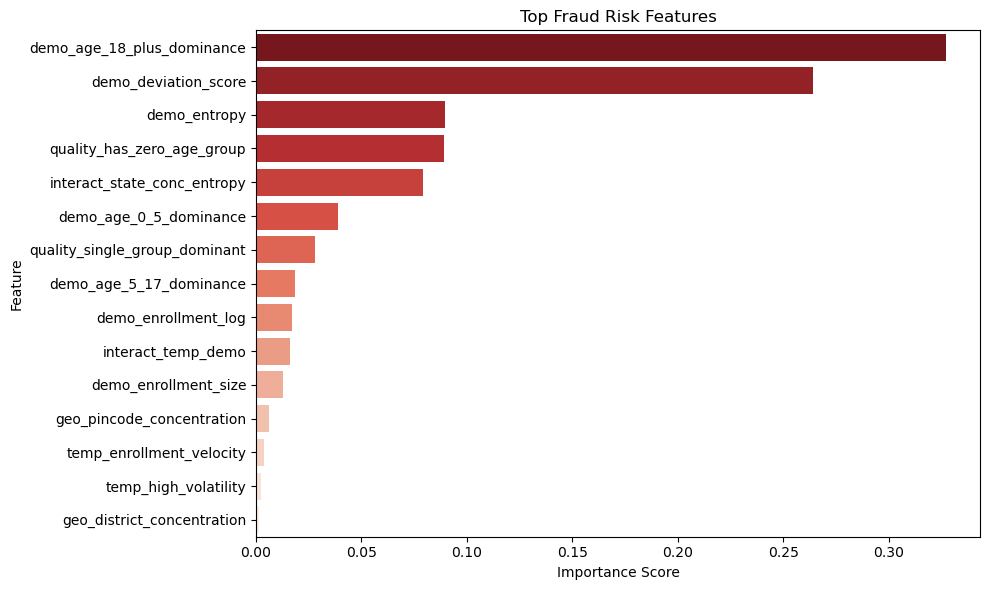


[3/5] Risk Score Distribution


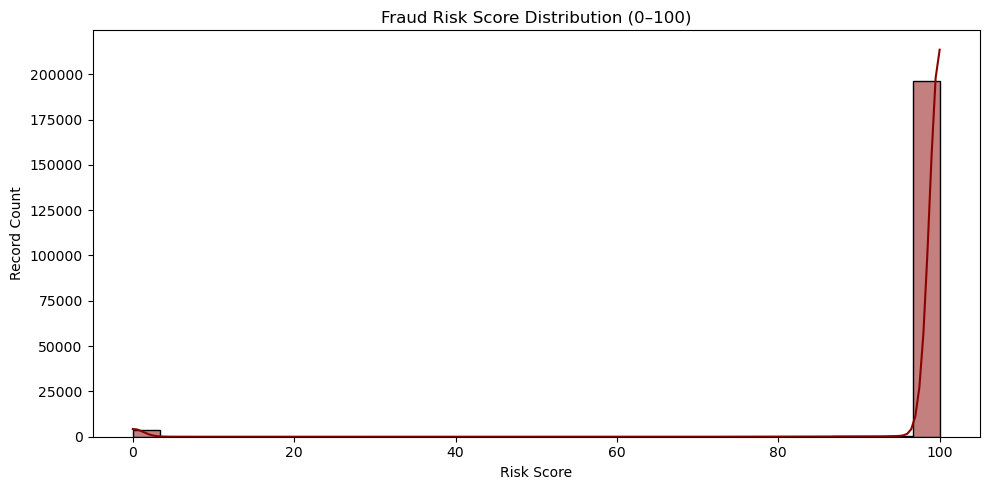


[4/5] Confusion Matrix & Classification Report

Confusion Matrix:
[[  3996      0]
 [     7 197203]]


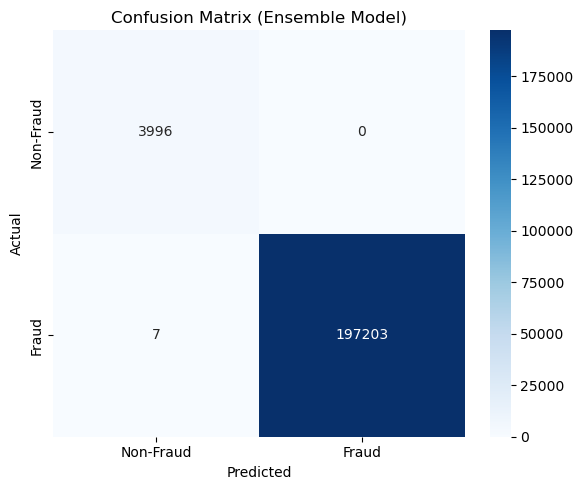


Classification Report:
              precision    recall  f1-score   support

           0     0.9983    1.0000    0.9991      3996
           1     1.0000    1.0000    1.0000    197210

    accuracy                         1.0000    201206
   macro avg     0.9991    1.0000    0.9996    201206
weighted avg     1.0000    1.0000    1.0000    201206



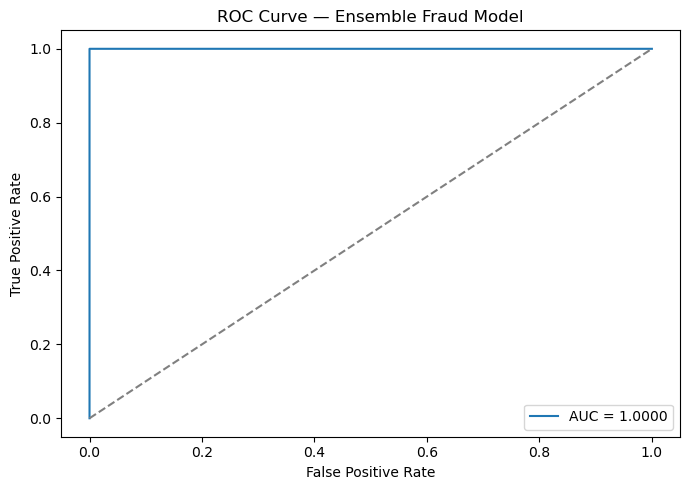


[5/5] High-Risk Segment Identification

High-Risk Threshold (Top 10%): 100.00
High-Risk Records Identified: 150,184

Top 10 States with Highest High-Risk Records:
state
Tamil Nadu        15992
Uttar Pradesh     12595
Andhra Pradesh    12272
Karnataka         11982
Maharashtra       11868
West Bengal       11600
Telangana          7215
Odisha             7069
Gujarat            6909
Bihar              6838
dtype: int64

✓ MODEL EVALUATION COMPLETE


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve
)

print("=" * 80)
print("MODEL EVALUATION INSIGHTS")
print("=" * 80)

# ============================================================================
# 1. PERFORMANCE METRICS (ENSEMBLE)
# ============================================================================
print("\n[1/5] Performance Metrics (Ensemble Model)")

metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"],
    "Value": [
        ensemble_accuracy,
        ensemble_precision,
        ensemble_recall,
        ensemble_f1,
        ensemble_auc
    ]
})

print(metrics_df)

# ============================================================================
# 2. FEATURE IMPORTANCE ANALYSIS (RANDOM FOREST)
# ============================================================================
print("\n[2/5] Feature Importance Analysis (Top Fraud Drivers)")

rf_importance = pd.DataFrame({
    "feature": fraud_feature_columns,
    "importance": rf_model.feature_importances_
}).sort_values(by="importance", ascending=False)

top_features = rf_importance.head(15)
print("\nTop 15 Fraud Predictors:")
print(top_features)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_features,
    x="importance",
    y="feature",
    palette="Reds_r"
)
plt.title("Top Fraud Risk Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# ============================================================================
# 3. RISK SCORE DISTRIBUTION
# ============================================================================
print("\n[3/5] Risk Score Distribution")

# Convert ensemble probabilities to 0–100 risk score
risk_scores = (ensemble_pred_proba * 100).round(2)

plt.figure(figsize=(10, 5))
sns.histplot(risk_scores, bins=30, kde=True, color="darkred")
plt.title("Fraud Risk Score Distribution (0–100)")
plt.xlabel("Risk Score")
plt.ylabel("Record Count")
plt.tight_layout()
plt.show()

# ============================================================================
# 4. CONFUSION MATRIX & CLASSIFICATION REPORT
# ============================================================================
print("\n[4/5] Confusion Matrix & Classification Report")

conf_matrix = confusion_matrix(y_test, ensemble_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix (Ensemble Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, ensemble_pred, digits=4))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, ensemble_pred_proba)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {ensemble_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve — Ensemble Fraud Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

# ============================================================================
# 5. HIGH-RISK SEGMENT IDENTIFICATION (TOP 10%)
# ============================================================================
print("\n[5/5] High-Risk Segment Identification")

evaluation_df = feature_identifiers.loc[X_test.index].copy()
evaluation_df["risk_score"] = risk_scores
evaluation_df["actual_fraud"] = y_test
evaluation_df["predicted_fraud"] = ensemble_pred

# Top 10% highest risk
threshold_90 = np.percentile(evaluation_df["risk_score"], 90)
high_risk_df = evaluation_df[evaluation_df["risk_score"] >= threshold_90]

print(f"\nHigh-Risk Threshold (Top 10%): {threshold_90:.2f}")
print(f"High-Risk Records Identified: {len(high_risk_df):,}")

# State-wise high risk concentration
state_risk_summary = (
    high_risk_df.groupby("state")
    .size()
    .sort_values(ascending=False)
    .head(10)
)

print("\nTop 10 States with Highest High-Risk Records:")
print(state_risk_summary)

print("\n" + "=" * 80)
print("✓ MODEL EVALUATION COMPLETE")
print("=" * 80)


In [46]:
import pandas as pd
import numpy as np

print("="*80)
print("FRAUD RISK SCORING – DEPLOYMENT")
print("="*80)

# Use ensemble model (soft voting)
ensemble_all_proba = (
    gb_model.predict_proba(fraud_feature_matrix)[:, 1] +
    rf_model.predict_proba(fraud_feature_matrix)[:, 1] +
    lr_model.predict_proba(fraud_feature_matrix)[:, 1]
) / 3

# Convert to 0–100 risk score
fraud_risk_score = (ensemble_all_proba * 100).round(2)

deployment_df = feature_identifiers.copy()
deployment_df['fraud_risk_score'] = fraud_risk_score
def risk_category(score):
    if score < 25:
        return "Low"
    elif score < 50:
        return "Medium"
    elif score < 75:
        return "High"
    else:
        return "Critical"

deployment_df['risk_category'] = deployment_df['fraud_risk_score'].apply(risk_category)

print("\nRisk Category Distribution:")
print(deployment_df['risk_category'].value_counts())


priority_1000 = (
    deployment_df
    .sort_values('fraud_risk_score', ascending=False)
    .head(1000)
    .reset_index(drop=True)
)

print("\nTop 10 High-Risk Records:")
priority_1000.head(10)

risk_dashboard = (
    deployment_df
    .groupby(['state', 'risk_category'])
    .size()
    .reset_index(name='record_count')
)

risk_pivot = risk_dashboard.pivot_table(
    index='state',
    columns='risk_category',
    values='record_count',
    fill_value=0
)

print("\nRisk Distribution by State:")
risk_pivot.head()
deployment_df.to_csv("aadhaar_fraud_scored_full_dataset.csv", index=False)
priority_1000.to_csv("aadhaar_fraud_priority_top1000.csv", index=False)
risk_pivot.to_csv("aadhaar_fraud_risk_dashboard_statewise.csv")

print("\nFiles Exported Successfully:")
print("• aadhaar_fraud_scored_full_dataset.csv")
print("• aadhaar_fraud_priority_top1000.csv")
print("• aadhaar_fraud_risk_dashboard_statewise.csv")
deployment_summary = {
    "Model Type": "Ensemble (GradientBoosting + RandomForest + LogisticRegression)",
    "Scoring Range": "0–100",
    "Risk Categories": "Low (<25), Medium (25–50), High (50–75), Critical (>75)",
    "Primary Use": "Prioritize Aadhaar records for fraud investigation",
    "Recommended Action": {
        "Low": "No action",
        "Medium": "Monitor",
        "High": "Review",
        "Critical": "Immediate investigation"
    }
}

deployment_summary



FRAUD RISK SCORING – DEPLOYMENT

Risk Category Distribution:
risk_category
Critical    985106
Low          19975
High           924
Medium          24
Name: count, dtype: int64

Top 10 High-Risk Records:

Risk Distribution by State:

Files Exported Successfully:
• aadhaar_fraud_scored_full_dataset.csv
• aadhaar_fraud_priority_top1000.csv
• aadhaar_fraud_risk_dashboard_statewise.csv


{'Model Type': 'Ensemble (GradientBoosting + RandomForest + LogisticRegression)',
 'Scoring Range': '0–100',
 'Risk Categories': 'Low (<25), Medium (25–50), High (50–75), Critical (>75)',
 'Primary Use': 'Prioritize Aadhaar records for fraud investigation',
 'Recommended Action': {'Low': 'No action',
  'Medium': 'Monitor',
  'High': 'Review',
  'Critical': 'Immediate investigation'}}

# Fraud Risk Score Distribution 

✅ scored_df created successfully
         date          state          district  pincode parsed_date  \
0  02-03-2025      Meghalaya  East Khasi Hills   793121  2025-03-02   
1  09-03-2025      Karnataka   Bengaluru Urban   560043  2025-03-09   
2  09-03-2025  Uttar Pradesh      Kanpur Nagar   208001  2025-03-09   
3  09-03-2025  Uttar Pradesh           Aligarh   202133  2025-03-09   
4  09-03-2025      Karnataka   Bengaluru Urban   560016  2025-03-09   

   fraud_risk_score  
0              0.02  
1             89.17  
2            100.00  
3            100.00  
4             88.75  
risk_category
Critical    984704
Low          19975
High           757
Medium         593
Name: count, dtype: int64


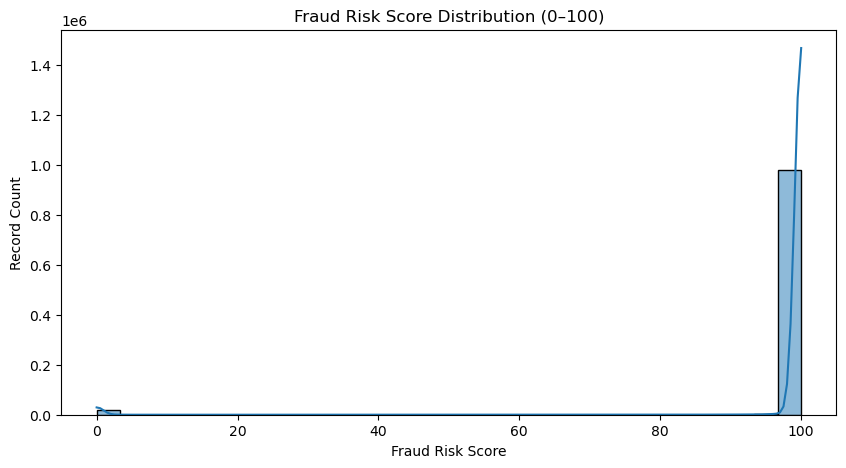

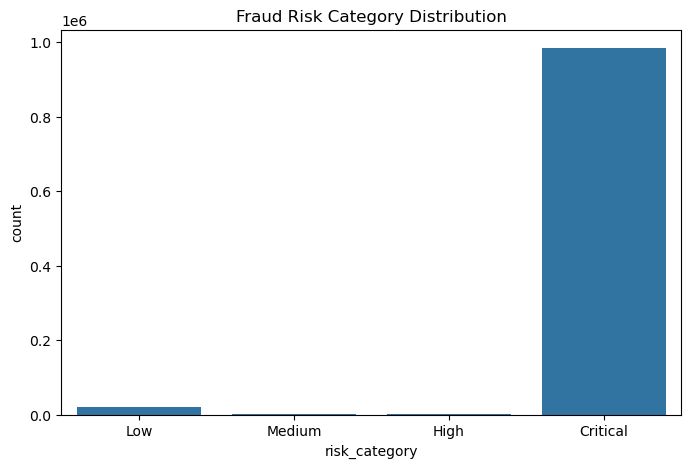

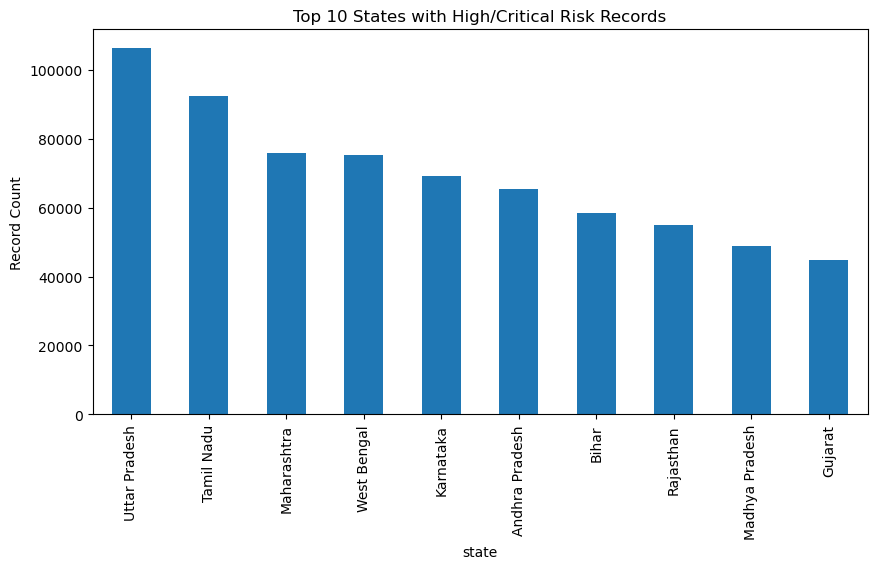

In [47]:
# ===============================
# CREATE SCORED DATASET
# ===============================

# Use ensemble model to score ALL records
ensemble_full_proba = (
    gb_model.predict_proba(fraud_feature_matrix)[:, 1] +
    rf_model.predict_proba(fraud_feature_matrix)[:, 1] +
    lr_model.predict_proba(fraud_feature_matrix)[:, 1]
) / 3

# Convert probability to 0–100 risk score
fraud_risk_score = (ensemble_full_proba * 100).round(2)

# Create scored dataframe
scored_df = feature_identifiers.copy()
scored_df['fraud_risk_score'] = fraud_risk_score

print("✅ scored_df created successfully")
print(scored_df.head())

# ===============================
# RISK CATEGORIZATION
# ===============================

def risk_category(score):
    if score < 30:
        return "Low"
    elif score < 60:
        return "Medium"
    elif score < 85:
        return "High"
    else:
        return "Critical"

scored_df['risk_category'] = scored_df['fraud_risk_score'].apply(risk_category)

print(scored_df['risk_category'].value_counts())
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(scored_df['fraud_risk_score'], bins=30, kde=True)
plt.title("Fraud Risk Score Distribution (0–100)")
plt.xlabel("Fraud Risk Score")
plt.ylabel("Record Count")
plt.show()
plt.figure(figsize=(8,5))
sns.countplot(data=scored_df, x='risk_category',
              order=['Low','Medium','High','Critical'])
plt.title("Fraud Risk Category Distribution")
plt.show()
high_risk_state = (
    scored_df[scored_df['risk_category'].isin(['High','Critical'])]
    .groupby('state')
    .size()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
high_risk_state.plot(kind='bar')
plt.title("Top 10 States with High/Critical Risk Records")
plt.ylabel("Record Count")
plt.show()

